# Produisez une étude de marché

# Mise en situation


Votre entreprise d'agroalimentaire souhaite se développer à l'international. Elle est spécialisée dans le poulet !

L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Votre objectif sera d'aider à cibler plus particulièrement certains pays, dans le but d'approfondir ensuite l'étude de marché. Plus particulièrement, l'idéal serait de produire des "groupes" de pays, plus ou moins gros, dont on connaît les caractéristiques.

Dans un premier temps, la stratégie est plutôt d'exporter les produits plutôt que de produire sur place, c'est-à-dire dans le(s) nouveau(x) pays ciblé(s).

##### Les données
Vous vous souvenez de la FAO, dans l'un de vos précédents projets ? Allez, on y retourne ! Vous connaissez déjà l'interface du site, à vous de retrouver les données qui vous seront utiles pour le projet.

### Votre mission

Pour identifier les pays propices à une insertion dans le marché du poulet, il vous a été demandé de cibler les pays. Il vous faudra également étudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.


###### Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

* Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
* Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
* Disponibilité alimentaire en protéines par habitant.
* Disponibilité alimentaire en calories par habitant.

###### Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

###### Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

###### Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

###### Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

###### Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

* un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale.
* un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

## Construction du dataframe 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN
import seaborn as sns
import sys
import scipy.stats as st
from scipy.stats import ks_2samp,bartlett,ttest_ind
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.datasets.samples_generator import make_blobs
from sklearn import decomposition
from sklearn import preprocessing
from acp import display_scree_plot, display_circles, display_factorial_planes
import pingouin as pg
from scipy import stats
from scipy.stats import shapiro

In [2]:
# import des données population 2012
df_pop_2012 = pd.read_csv('population_2012.csv')

In [3]:
# import des données population 2013
df_pop_2013 = pd.read_csv('population_2013.csv')

In [4]:
#selection de colonne 
df_pop_2013 =df_pop_2013[['Zone', 'Valeur']]
df_pop_2013.head()

,Zone,Valeur
0,Afghanistan,31731.688
1,Afrique du Sud,53767.396
2,Albanie,2918.978
3,Algérie,38338.562
4,Allemagne,81265.139


In [5]:
# tranformation de la valeur en milliers
df_pop_2013['Valeur']= df_pop_2013['Valeur']*1000
df_pop_2013.head()

,Zone,Valeur
0,Afghanistan,31731688.0
1,Afrique du Sud,53767396.0
2,Albanie,2918978.0
3,Algérie,38338562.0
4,Allemagne,81265139.0


In [6]:
# on renomme le colonne
df_pop_2013.columns = ['pays', 'population_milliers_2013']
df_pop_2013.head()

,pays,population_milliers_2013
0,Afghanistan,31731688.0
1,Afrique du Sud,53767396.0
2,Albanie,2918978.0
3,Algérie,38338562.0
4,Allemagne,81265139.0


In [7]:
#selection de colonne 
df_pop_2012 =df_pop_2012[['Zone', 'Valeur']]
df_pop_2012.head()

,Zone,Valeur
0,Afghanistan,30696.958
1,Afrique du Sud,52998.213
2,Albanie,2920.039
3,Algérie,37565.847
4,Allemagne,81066.228


In [8]:
# tranformation de la valeur en milliers
df_pop_2012['Valeur']= df_pop_2012['Valeur']*1000
df_pop_2012.head()

,Zone,Valeur
0,Afghanistan,30696958.0
1,Afrique du Sud,52998213.0
2,Albanie,2920039.0
3,Algérie,37565847.0
4,Allemagne,81066228.0


In [9]:
# on renomme le colonne
df_pop_2012.columns = ['pays', 'population_milliers_2012']
df_pop_2012.head()

,pays,population_milliers_2012
0,Afghanistan,30696958.0
1,Afrique du Sud,52998213.0
2,Albanie,2920039.0
3,Algérie,37565847.0
4,Allemagne,81066228.0


In [10]:
# jointure de df_pop_2013 avec df_pop_2018
df_population= df_pop_2013.merge(df_pop_2012, 'outer')
df_population.head()

,pays,population_milliers_2013,population_milliers_2012
0,Afghanistan,31731688.0,30696958.0
1,Afrique du Sud,53767396.0,52998213.0
2,Albanie,2918978.0,2920039.0
3,Algérie,38338562.0,37565847.0
4,Allemagne,81265139.0,81066228.0


In [11]:
# construction de df population avec calcule du pourcetange de difference de population entre  l'année 2013 et l'année 2012
df_population['pourcentage_dif_pop_2012_2013']= (df_population['population_milliers_2013']- df_population['population_milliers_2012']) /df_population['population_milliers_2013']*100
df_population.head()

,pays,population_milliers_2013,population_milliers_2012,pourcentage_dif_pop_2012_2013
0,Afghanistan,31731688.0,30696958.0,3.260873
1,Afrique du Sud,53767396.0,52998213.0,1.430575
2,Albanie,2918978.0,2920039.0,-0.036348
3,Algérie,38338562.0,37565847.0,2.015503
4,Allemagne,81265139.0,81066228.0,0.244768


In [12]:
# Import des données des bilans alimentaires
veg = pd.read_csv("FAO_data_vege.csv")
ani = pd.read_csv("FAO_data_ani.csv")

# Ajout de la variable origin
ani["origin"] = "animal"
veg["origin"] = "vegetal"

# On regroupe veg et ani en un unique dataframe, via une union
temp = ani.append(veg)

# Suppression de ani et veg
del ani, veg

# On renomme les colonnes de temp
temp.columns = ["xx","xx2","country_code","pays",'xx3','element'
    ,'item_code','produit','xx4',"année","unit","value",'xx5','xx6'
    ,'origin']

# Transformation de temp en table pivot
data = temp.pivot_table(
    index=["country_code","pays","item_code","produit","année","origin"],
    columns = ["element"], values =["value"], aggfunc=sum)
# On renomme les colonnes (attention l'ordre peut changer selon vos données !)
data.columns = [ 'Disponibilité_alimentaire(Kcal/personne/jour)','Disponibilité_protéines(g/personne/jour)']

data = data.reset_index()
df= data[['pays','produit', 'année', 'origin', 'Disponibilité_alimentaire(Kcal/personne/jour)','Disponibilité_protéines(g/personne/jour)']]
df.head()

,pays,produit,année,origin,Disponibilité_alimentaire(Kcal/personne/jour),Disponibilité_protéines(g/personne/jour)
0,Arménie,Blé,2013,vegetal,1024.0,30.52
1,Arménie,Orge,2013,vegetal,0.0,0.00
2,Arménie,Maïs,2013,vegetal,0.0,0.01
3,Arménie,Seigle,2013,vegetal,1.0,0.02
4,Arménie,Avoine,2013,vegetal,2.0,0.09


In [13]:
# création de df avec les proteines d'animaux
df_prot_ani = df[df['origin']== 'animal']
df_prot_ani = df_prot_ani [['pays', 'Disponibilité_protéines(g/personne/jour)']]
df_prot_ani_pays = df_prot_ani.groupby(['pays']).sum().reset_index()
df_prot_ani_pays.columns = ['pays', 'Disponibilité de protéines animal (g/personne/jour)']
df_prot_ani_pays.head()

,pays,Disponibilité de protéines animal (g/personne/jour)
0,Afghanistan,12.21
1,Afrique du Sud,36.39
2,Albanie,59.41
3,Algérie,24.98
4,Allemagne,61.49


In [14]:
# on controle s'il n'y a pas des doublon par rapport à la Chine
df_prot_ani_pays[df_prot_ani_pays['pays'].str.contains('Chine')]

,pays,Disponibilité de protéines animal (g/personne/jour)
33,Chine - RAS de Hong-Kong,94.40
34,Chine - RAS de Macao,61.10
35,"Chine, Taiwan Province de",43.48
36,"Chine, continentale",39.27


In [15]:
# création de df pays 
df_pays = df.groupby(['pays']).sum().reset_index()
df_pays = df_pays[['pays','Disponibilité_protéines(g/personne/jour)','Disponibilité_alimentaire(Kcal/personne/jour)']]
df_pays.head()

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour)
0,Afghanistan,58.26,2087.0
1,Afrique du Sud,85.33,3020.0
2,Albanie,111.37,3188.0
3,Algérie,91.92,3293.0
4,Allemagne,101.39,3503.0


In [16]:
df_pays[df_pays['pays'].str.contains('Chine')]

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour)
33,Chine - RAS de Hong-Kong,129.07,3286.0
34,Chine - RAS de Macao,94.75,2915.0
35,"Chine, Taiwan Province de",89.73,2998.0
36,"Chine, continentale",98.05,3112.0


In [17]:
# jointure de df proteines avec df pays
df_proteines=pd.merge(df_pays, df_prot_ani_pays, on= 'pays', how= 'outer')
df_proteines.head()

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),Disponibilité de protéines animal (g/personne/jour)
0,Afghanistan,58.26,2087.0,12.21
1,Afrique du Sud,85.33,3020.0,36.39
2,Albanie,111.37,3188.0,59.41
3,Algérie,91.92,3293.0,24.98
4,Allemagne,101.39,3503.0,61.49


In [18]:
# création de variable ratio de protéines
df_pays['ratio_prot_ani_prot_total'] = df_proteines['Disponibilité de protéines animal (g/personne/jour)']/df_proteines['Disponibilité_protéines(g/personne/jour)']*100
df_pays.head()

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total
0,Afghanistan,58.26,2087.0,20.957775
1,Afrique du Sud,85.33,3020.0,42.646197
2,Albanie,111.37,3188.0,53.344707
3,Algérie,91.92,3293.0,27.175805
4,Allemagne,101.39,3503.0,60.647007


In [19]:
# jointure de df pays avec df population
df = pd.merge(df_pays,df_population, on = 'pays', how='outer')
df= df[['pays','Disponibilité_protéines(g/personne/jour)','Disponibilité_alimentaire(Kcal/personne/jour)', 'ratio_prot_ani_prot_total','pourcentage_dif_pop_2012_2013']]
df.head()

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,Afghanistan,58.26,2087.0,20.957775,3.260873
1,Afrique du Sud,85.33,3020.0,42.646197,1.430575
2,Albanie,111.37,3188.0,53.344707,-0.036348
3,Algérie,91.92,3293.0,27.175805,2.015503
4,Allemagne,101.39,3503.0,60.647007,0.244768


In [20]:
# on regarde s'il n'y a pas de valeurs manquantes
missing_data = df.isnull()
missing_data.head()

,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [21]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

pays
False    230
Name: pays, dtype: int64

Disponibilité_protéines(g/personne/jour)
False    174
True      56
Name: Disponibilité_protéines(g/personne/jour), dtype: int64

Disponibilité_alimentaire(Kcal/personne/jour)
False    174
True      56
Name: Disponibilité_alimentaire(Kcal/personne/jour), dtype: int64

ratio_prot_ani_prot_total
False    174
True      56
Name: ratio_prot_ani_prot_total, dtype: int64

pourcentage_dif_pop_2012_2013
False    230
Name: pourcentage_dif_pop_2012_2013, dtype: int64



In [22]:
# on rempli les valeurs manquantes avec les moyennes
avg_norm_loss_pro = df["Disponibilité_protéines(g/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité de protéines en quantité (g/personne/jour):", avg_norm_loss_pro)

df["Disponibilité_protéines(g/personne/jour)"].replace(np.nan, avg_norm_loss_pro, inplace=True)

avg_norm_loss_kcal = df["Disponibilité_alimentaire(Kcal/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité alimentaire (Kcal/personne/jour):", avg_norm_loss_kcal)

df["Disponibilité_alimentaire(Kcal/personne/jour)"].replace(np.nan, avg_norm_loss_kcal, inplace=True)

avg_norm_loss_ratio = df["ratio_prot_ani_prot_total"].astype("float").mean(axis=0)
print("Moyenne de ratio_prot_ani_prot_total :", avg_norm_loss_ratio)

df["ratio_prot_ani_prot_total"].replace(np.nan, avg_norm_loss_ratio, inplace=True)

Moyenne de Disponibilité de protéines en quantité (g/personne/jour): 81.29959770114941
Moyenne de Disponibilité alimentaire (Kcal/personne/jour): 2847.367816091954
Moyenne de ratio_prot_ani_prot_total : 42.768670501208156


### Fin de construction de df et nettoyage des données 

##### Tâches efectuées :

* Import des données 
* Construction de variables' Ratio_prot_ani_prot_total' et 'pourcentage_dif_pop_2012_2013'
* Voir s'il n'y avait pas des doublons
* Remplissage  des valeurs manquantes par la moyenne de la variable.

## Construction de dendrogramme et decoupage en 5 groupes

In [23]:
df.index = df['pays']
del df['pays']
df.head()

,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,
Afghanistan,58.26,2087.0,20.957775,3.260873
Afrique du Sud,85.33,3020.0,42.646197,1.430575
Albanie,111.37,3188.0,53.344707,-0.036348
Algérie,91.92,3293.0,27.175805,2.015503
Allemagne,101.39,3503.0,60.647007,0.244768


In [24]:
# standardisation des données
X = df.values
X=StandardScaler().fit_transform(X)

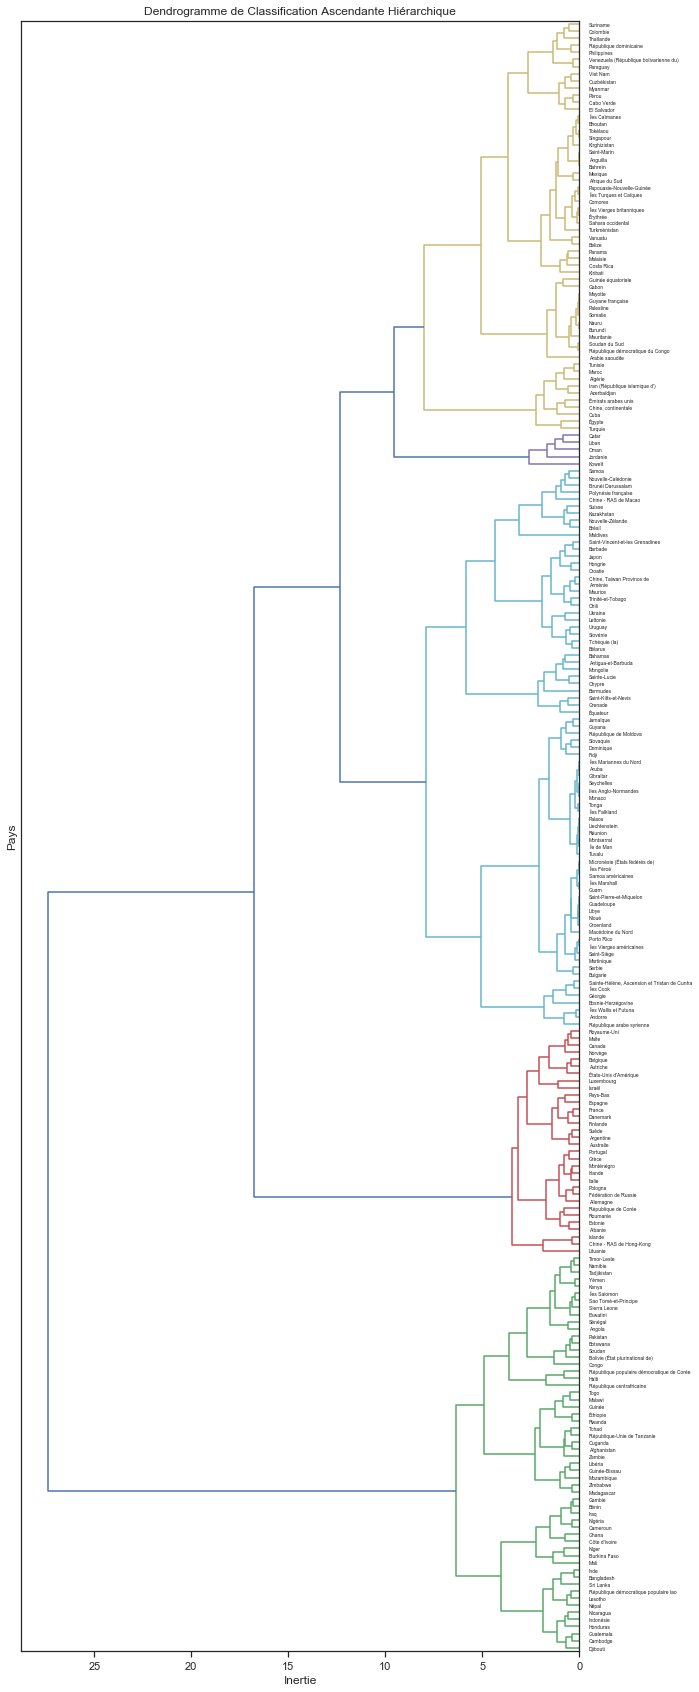

In [25]:
# plot de dendrogramme
Z = sch.linkage(X ,method='ward',metric='euclidean')

fig =plt.figure(figsize=(10,30))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Pays')
entire_dendro = sch.dendrogram(Z,labels = df.index,color_threshold=9, orientation='left')
plt.show(entire_dendro)


fig.savefig('Dendrogramme_de_Classification_Ascendante_Hiérarchique')



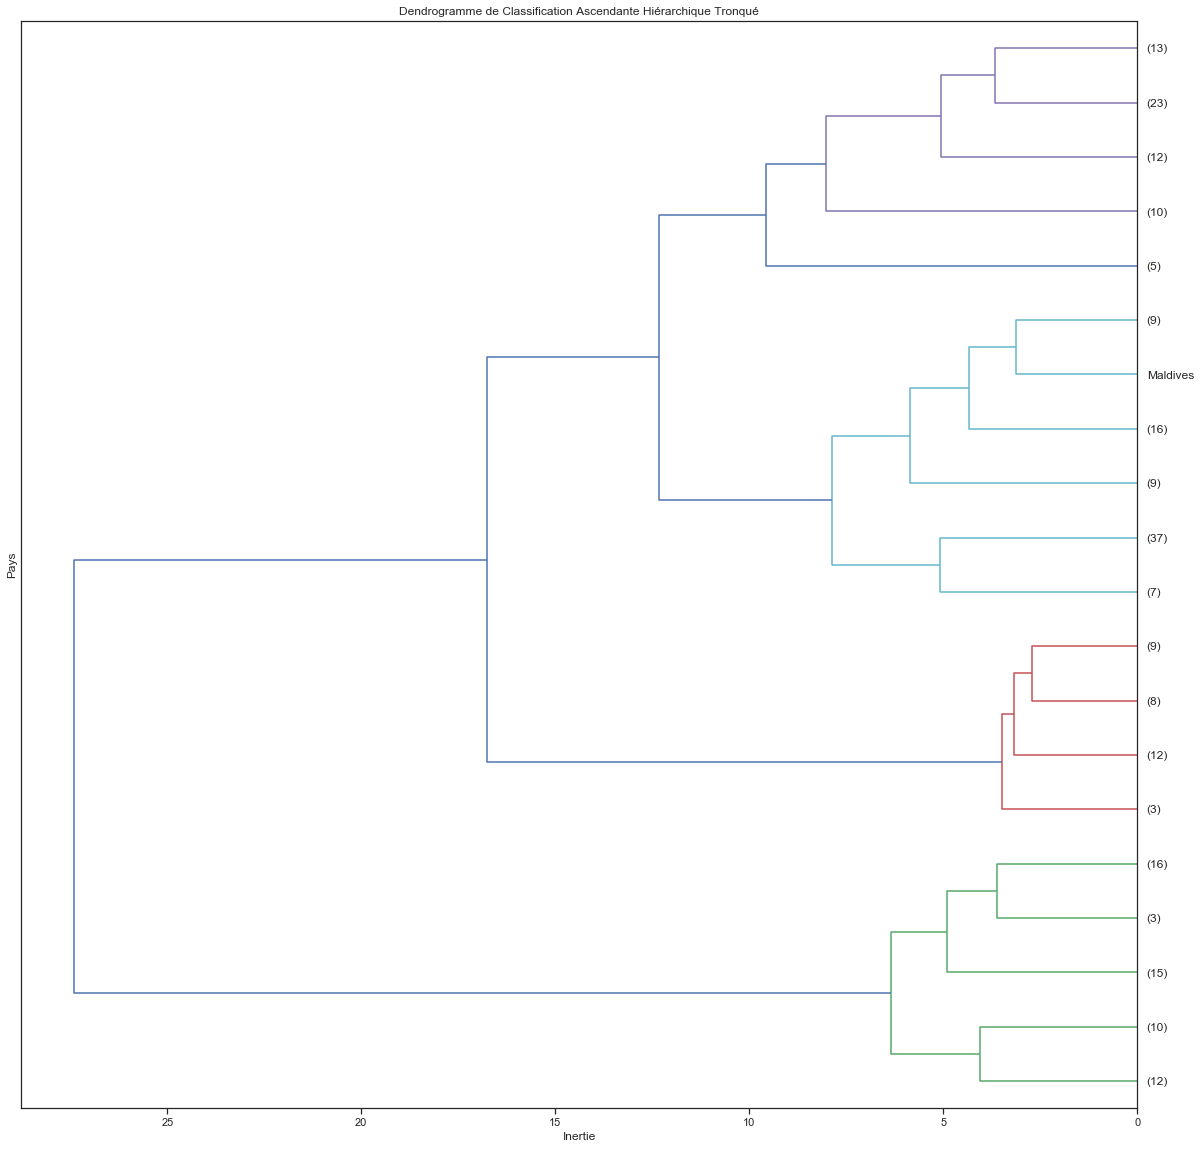

In [26]:
fig2 =plt.figure(figsize=(20,20))
plt.title('Dendrogramme de Classification Ascendante Hiérarchique Tronqué')
plt.xlabel("Inertie")
plt.ylabel('Pays')
truncate_dendro = sch.dendrogram(Z,labels = df.index,color_threshold=9, orientation='left', p=20, truncate_mode='lastp')
plt.show(truncate_dendro)

fig2.savefig('Dendrogramme_de_Classification_Ascendante_Hiérarchique_Tronqué')

### Classification ascendante hiérarchique
##### Découpage en classes – Matérialisation des groupes

In [27]:
#découpage à la hauteur t = 9==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,5,criterion='maxclust')
print(groupes_cah)

[1 5 2 5 2 1 3 5 2 3 2 2 5 3 1 3 2 5 3 1 3 1 3 3 3 1 3 1 5 1 1 2 3 2 3 3 5
 3 5 1 5 3 5 1 2 1 3 5 2 2 1 3 2 2 2 5 1 1 3 2 1 1 1 3 3 1 1 3 1 1 5 1 2 2
 2 2 3 3 4 3 1 5 5 4 1 3 4 1 2 2 3 1 5 1 3 1 2 5 3 5 5 3 2 1 5 1 1 1 1 2 3
 3 1 4 1 5 1 5 5 2 5 2 3 2 5 2 2 1 1 2 3 5 1 1 1 3 3 3 3 1 3 1 3 3 1 1 3 5
 2 1 1 1 3 5 1 1 3 5 5 5 3 3 5 5 5 1 1 1 5 5 3 2 1 1 3 5 3 5 5 5 5 5 3 3 3
 3 5 5 3 3 5 3 3 3 3 3 5 3 5 3 3 3 3 5 3 3 3 5 3 3 5 5 3 4 3 5 3 5 3 5 3 3
 3 3 5 5 5 5 3 3]


In [28]:
# df cluster 
idg = np.argsort(groupes_cah)
df_dendogramme = pd.DataFrame(df.index[idg],groupes_cah[idg]).reset_index()
df_dendogramme = df_dendogramme.rename(columns={'index':'cluster'})
df_dendogramme.head()

,cluster,pays
0,1,Afghanistan
1,1,Nicaragua
2,1,Namibie
3,1,Mozambique
4,1,Mali


In [29]:
#Réindexation df pour jointure
df.reset_index(inplace=True)

In [30]:
df = pd.merge(df_dendogramme,df)
df.head()

,cluster,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,1,Afghanistan,58.26,2087.0,20.957775,3.260873
1,1,Nicaragua,69.54,2638.0,30.500431,1.154422
2,1,Namibie,57.61,2166.0,33.935081,2.270043
3,1,Mozambique,45.68,2282.0,13.879159,2.866594
4,1,Mali,85.13,2887.0,27.828028,2.859286


In [31]:
df.describe()

,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2.900000,81.299598,2847.367816,42.768671,1.272012
std,1.463829,17.352631,381.172327,14.039801,1.396311
min,1.000000,37.660000,1879.000000,9.825674,-3.087262
25%,2.000000,69.757500,2624.000000,34.369379,0.384537
50%,3.000000,81.299598,2847.367816,42.768671,1.176439
75%,4.750000,90.285000,3065.000000,53.136857,2.218281
max,5.000000,133.060000,3770.000000,73.138607,6.817495


In [32]:
df.to_csv('pays_avec_clusters.csv')

###### Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vue de vos objectifs.

Import de data de duex variables  : 'pib par habitant' et ' ratio importation / exportation de poulets'

In [33]:
# import de donnes pib
df_pib =pd.read_csv('pib_fao.csv')

In [34]:
# import de donnes pib
df_poulets =pd.read_csv('FAOSTAT_data_imp_expo_poulets.csv')

#### Preparation des données pour jointure avec df

In [35]:
df_pib = df_pib[['Zone','Valeur']]
df_pib.head()

,Zone,Valeur
0,Afghanistan,681.034215
1,Afrique du Sud,6819.093360
2,Albanie,4376.970549
3,Algérie,5471.123389
4,Allemagne,46176.177749


In [36]:
# création de df pib en euros
df_pib['Valeur'] = df_pib['Valeur']*0.91
df_pib.columns=['pays', 'PIB_en_euros']
df_pib.head()

,pays,PIB_en_euros
0,Afghanistan,619.741136
1,Afrique du Sud,6205.374958
2,Albanie,3983.043200
3,Algérie,4978.722284
4,Allemagne,42020.321752


In [37]:
df_poulets = df_poulets[['Zone','Élément','Valeur']]
df_poulets.head()

,Zone,Élément,Valeur
0,Afghanistan,Importations - Quantité,2874.0
1,Afghanistan,Exportations - Quantité,0.0
2,Afrique du Sud,Importations - Quantité,544.0
3,Afrique du Sud,Exportations - Quantité,8198.0
4,Albanie,Importations - Quantité,6443.0


In [38]:
# Transformation de temp en table pivot
data = df_poulets.pivot_table(
    index=["Zone"],
    columns = ["Élément"], values =["Valeur"], aggfunc=sum)
# On renomme les colonnes (attention l'ordre peut changer selon vos données !)
data.columns = [ 'exportations','importations']

data = data.reset_index()
df_poulets= data[['Zone','exportations','importations']]
df_poulets.head()

,Zone,exportations,importations
0,Afghanistan,0.0,2874.0
1,Afrique du Sud,8198.0,544.0
2,Albanie,0.0,6443.0
3,Algérie,0.0,5699.0
4,Allemagne,270858.0,166356.0


In [39]:
df_poulets.columns = [ 'pays','exportations','importations']

In [40]:
temp= pd.merge(df_pib, df_poulets, on ='pays', how= 'left')
temp.head()

,pays,PIB_en_euros,exportations,importations
0,Afghanistan,619.741136,0.0,2874.0
1,Afrique du Sud,6205.374958,8198.0,544.0
2,Albanie,3983.043200,0.0,6443.0
3,Algérie,4978.722284,0.0,5699.0
4,Allemagne,42020.321752,270858.0,166356.0


In [41]:
# jointure de df avec df pib
df = pd.merge(temp,df, on= ['pays'], how= 'right' )
df.head()

,pays,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,Afghanistan,619.741136,0.0,2874.0,1,58.26,2087.0,20.957775,3.260873
1,Afrique du Sud,6205.374958,8198.0,544.0,5,85.33,3020.0,42.646197,1.430575
2,Albanie,3983.043200,0.0,6443.0,2,111.37,3188.0,53.344707,-0.036348
3,Algérie,4978.722284,0.0,5699.0,5,91.92,3293.0,27.175805,2.015503
4,Allemagne,42020.321752,270858.0,166356.0,2,101.39,3503.0,60.647007,0.244768


In [42]:
df.index = df['pays']
del df['pays']
df.head()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Afghanistan,619.741136,0.0,2874.0,1,58.26,2087.0,20.957775,3.260873
Afrique du Sud,6205.374958,8198.0,544.0,5,85.33,3020.0,42.646197,1.430575
Albanie,3983.043200,0.0,6443.0,2,111.37,3188.0,53.344707,-0.036348
Algérie,4978.722284,0.0,5699.0,5,91.92,3293.0,27.175805,2.015503
Allemagne,42020.321752,270858.0,166356.0,2,101.39,3503.0,60.647007,0.244768


In [43]:
# on regarde s'il n'y a pas de valeurs manquantes
missing_data = df.isnull()
missing_data.head()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False
Afrique du Sud,False,False,False,False,False,False,False,False
Albanie,False,False,False,False,False,False,False,False
Algérie,False,False,False,False,False,False,False,False
Allemagne,False,False,False,False,False,False,False,False


In [44]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

PIB_en_euros
False    208
True      22
Name: PIB_en_euros, dtype: int64

exportations
False    148
True      82
Name: exportations, dtype: int64

importations
False    186
True      44
Name: importations, dtype: int64

cluster
False    230
Name: cluster, dtype: int64

Disponibilité_protéines(g/personne/jour)
False    230
Name: Disponibilité_protéines(g/personne/jour), dtype: int64

Disponibilité_alimentaire(Kcal/personne/jour)
False    230
Name: Disponibilité_alimentaire(Kcal/personne/jour), dtype: int64

ratio_prot_ani_prot_total
False    230
Name: ratio_prot_ani_prot_total, dtype: int64

pourcentage_dif_pop_2012_2013
False    230
Name: pourcentage_dif_pop_2012_2013, dtype: int64



In [45]:
avg_norm_loss_pro = df["Disponibilité_protéines(g/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité de protéines en quantité (g/personne/jour):", avg_norm_loss_pro)

df["Disponibilité_protéines(g/personne/jour)"].replace(np.nan, avg_norm_loss_pro, inplace=True)

avg_norm_loss_kcal = df["Disponibilité_alimentaire(Kcal/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité alimentaire (Kcal/personne/jour):", avg_norm_loss_kcal)

df["Disponibilité_alimentaire(Kcal/personne/jour)"].replace(np.nan, avg_norm_loss_kcal, inplace=True)

avg_norm_loss_ratio = df["ratio_prot_ani_prot_total"].astype("float").mean(axis=0)
print("Moyenne de ratio_prot_ani_prot_total :", avg_norm_loss_ratio)

df["ratio_prot_ani_prot_total"].replace(np.nan, avg_norm_loss_ratio, inplace=True)

avg_norm_loss_ratio = df['pourcentage_dif_pop_2012_2013'].astype("float").mean(axis=0)
print("Moyenne de pourcentage_dif_pop_2012_2013 :", avg_norm_loss_ratio)

df['pourcentage_dif_pop_2012_2013'].replace(np.nan, avg_norm_loss_ratio, inplace=True)

avg_norm_loss_ratio = df['PIB_en_euros'].astype("float").mean(axis=0)
print("Moyenne de 'PIB_en_euros' :", avg_norm_loss_ratio)

df['PIB_en_euros'].replace(np.nan, avg_norm_loss_ratio, inplace=True)
df['exportations'].replace(np.nan, 0, inplace=True)
df['importations'].replace(np.nan, 0, inplace=True)

Moyenne de Disponibilité de protéines en quantité (g/personne/jour): 81.29959770114932
Moyenne de Disponibilité alimentaire (Kcal/personne/jour): 2847.3678160919585
Moyenne de ratio_prot_ani_prot_total : 42.768670501208106
Moyenne de pourcentage_dif_pop_2012_2013 : 1.272012129801361
Moyenne de 'PIB_en_euros' : 15537.993279423124


In [46]:
df 

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Afghanistan,619.741136,0.0,2874.0,1,58.260000,2087.000000,20.957775,3.260873
Afrique du Sud,6205.374958,8198.0,544.0,5,85.330000,3020.000000,42.646197,1.430575
Albanie,3983.043200,0.0,6443.0,2,111.370000,3188.000000,53.344707,-0.036348
Algérie,4978.722284,0.0,5699.0,5,91.920000,3293.000000,27.175805,2.015503
Allemagne,42020.321752,270858.0,166356.0,2,101.390000,3503.000000,60.647007,0.244768
Andorre,36965.940575,0.0,0.0,3,81.299598,2847.367816,42.768671,-2.033718
Angola,4785.151730,0.0,702.0,1,57.270000,2474.000000,32.128514,3.470183
Anguilla,17934.019039,0.0,0.0,5,81.299598,2847.367816,42.768671,1.188894
Antigua-et-Barbuda,11097.040129,3.0,23.0,3,83.490000,2416.000000,68.068032,1.070289


In [47]:
df.to_csv('df_clusters_avec_pib_et_exp_imp.csv')

In [48]:
df.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,15537.993279,6796.021739,6217.313043,2.900000,81.299598,2847.367816,42.768671,1.272012
std,22537.577484,31587.853827,25770.472779,1.463829,17.352631,381.172327,14.039801,1.396311
min,122.139890,0.000000,0.000000,1.000000,37.660000,1879.000000,9.825674,-3.087262
25%,2150.888539,0.000000,3.000000,2.000000,69.757500,2624.000000,34.369379,0.384537
50%,7245.224014,0.000000,310.500000,3.000000,81.299598,2847.367816,42.768671,1.176439
75%,16273.413131,304.250000,2135.250000,4.750000,90.285000,3065.000000,53.136857,2.218281
max,157910.012504,330181.000000,274401.000000,5.000000,133.060000,3770.000000,73.138607,6.817495


### Caracterisations de clusters selon les variables

In [49]:
# df avec les pays de cluster 1
df_cluster_1 = df.loc[df['cluster']==1]
df_cluster_1

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Afghanistan,619.741136,0.0,2874.0,1,58.26,2087.0,20.957775,3.260873
Angola,4785.151730,0.0,702.0,1,57.27,2474.0,32.128514,3.470183
Bangladesh,886.516122,0.0,2356.0,1,55.86,2453.0,17.776584,1.170416
Bénin,828.708973,0.0,73.0,1,64.38,2619.0,22.134203,2.751685
Bolivie (État plurinational de),2682.624055,0.0,1623.0,1,65.96,2250.0,45.118253,1.550538
Botswana,6370.918990,0.0,807.0,1,64.85,2325.0,40.755590,1.841291
Burkina Faso,636.801150,239.0,559.0,1,79.37,2717.0,13.959934,2.937475
Cambodge,935.861445,0.0,136.0,1,65.66,2473.0,29.119708,1.636365
Cameroun,1359.310975,0.0,1696.0,1,69.96,2669.0,16.709548,2.647486


In [50]:
df_cluster_1.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,56.000000,56.000000,56.000000,56.0,56.000000,56.000000,56.000000,56.000000
mean,1613.758015,238.500000,1368.517857,1.0,60.396429,2390.321429,24.618689,2.247175
std,1423.956528,776.491386,2659.559109,0.0,8.882335,245.033586,8.470631,0.785576
min,290.412627,0.000000,0.000000,1.0,37.660000,1879.000000,9.825674,0.205282
25%,634.320354,0.000000,32.750000,1.0,56.047500,2204.750000,17.776584,1.750168
50%,1094.359439,0.000000,583.500000,1.0,59.835000,2399.500000,23.201249,2.331957
75%,1749.289732,8.750000,1441.500000,1.0,64.797500,2553.500000,29.967441,2.778586
max,6370.918990,4357.000000,15068.000000,1.0,85.130000,3014.000000,45.118253,3.770346


In [51]:
# df avec les pays de cluster 2
df_cluster_2 = df.loc[df['cluster']==2]
df_cluster_2

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Albanie,3983.043200,0.0,6443.0,2,111.37,3188.0,53.344707,-0.036348
Allemagne,42020.321752,270858.0,166356.0,2,101.39,3503.0,60.647007,0.244768
Argentine,13119.853523,289.0,625.0,2,102.60,3226.0,65.233918,1.041812
Australie,60555.650570,258.0,0.0,2,106.26,3278.0,67.466591,1.420603
Autriche,45625.142817,9805.0,11802.0,2,106.20,3770.0,59.190207,0.702209
Belgique,42509.228949,99615.0,154169.0,2,99.37,3737.0,58.508604,0.609442
Canada,47561.113570,5874.0,60652.0,2,105.06,3499.0,52.065486,1.006340
Chine - RAS de Hong-Kong,35095.708030,0.0,3679.0,2,129.07,3286.0,73.138607,0.589936
Danemark,55457.953121,47796.0,4378.0,2,108.74,3366.0,64.199007,0.481694


In [52]:
df_cluster_2.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,32.000000,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000
mean,36194.827157,36227.250000,30332.312500,2.0,109.729375,3420.968750,59.412164,0.394217
std,22773.624782,75618.608662,61123.082515,0.0,8.597035,157.778016,6.480371,0.702381
min,3983.043200,0.000000,0.000000,2.0,96.120000,3173.000000,45.834951,-1.331583
25%,18787.220778,137.500000,402.000000,2.0,103.522500,3321.250000,54.611991,-0.024657
50%,36900.113703,5357.500000,5318.500000,2.0,108.695000,3404.000000,59.383779,0.436436
75%,46670.540310,25520.000000,16913.500000,2.0,111.392500,3500.000000,63.538547,0.698769
max,103140.526091,330181.000000,274401.000000,2.0,133.060000,3770.000000,73.138607,2.264278


In [53]:
# df avec les pays de cluster 3
df_cluster_3 = df.loc[df['cluster']==3]
df_cluster_3

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Andorre,36965.940575,0.0,0.0,3,81.299598,2847.367816,42.768671,-2.033718
Antigua-et-Barbuda,11097.040129,3.0,23.0,3,83.490000,2416.000000,68.068032,1.070289
Arménie,3497.667583,85.0,7243.0,3,90.060000,2924.000000,48.012436,0.400448
Aruba,22766.661146,11.0,37.0,3,81.299598,2847.367816,42.768671,0.591160
Bahamas,25756.063126,0.0,515.0,3,86.160000,2670.000000,65.506035,1.378698
Barbade,14337.438808,602.0,0.0,3,88.760000,2936.000000,56.917530,0.327069
Bélarus,7250.845756,56.0,22533.0,3,93.780000,3249.000000,58.594583,0.075663
Bermudes,81871.442504,0.0,0.0,3,90.360000,2668.000000,66.710934,-0.649982
Bosnie-Herzégovine,4588.901482,1227.0,888.0,3,91.500000,3156.000000,33.224044,-1.198364


In [54]:
df_cluster_3.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,79.000000,79.000000,79.000000,79.0,79.000000,79.000000,79.000000,79.000000
mean,19919.376572,3363.848101,3245.860759,3.0,83.867427,2880.014404,49.865083,0.257370
std,27310.326790,14158.677376,12280.076742,0.0,7.762041,189.642658,8.668651,0.936748
min,1241.080468,0.000000,0.000000,3.0,61.300000,2346.000000,33.224044,-3.087262
25%,6633.603139,0.000000,0.000000,3.0,81.299598,2847.367816,42.768671,-0.073460
50%,15361.894709,0.000000,18.000000,3.0,81.299598,2847.367816,48.012436,0.329460
75%,16028.273180,14.500000,648.000000,3.0,87.530000,2951.000000,57.343221,0.751825
max,157910.012504,91516.000000,97099.000000,3.0,122.320000,3393.000000,70.282865,2.816831


In [55]:
# df avec les pays de cluster 4
df_cluster_4 = df.loc[df['cluster']==4]
df_cluster_4

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Jordanie,3636.062144,378.0,942.0,4,79.580000,3099.000000,34.166876,5.002589
Koweït,44045.464913,698.0,2707.0,4,108.150000,3499.000000,49.533056,5.636668
Liban,8083.351598,27.0,976.0,4,79.590000,3059.000000,36.838799,6.817495
Oman,19316.774452,2.0,179.0,4,88.210000,3140.000000,51.808185,6.650634
Qatar,80357.398250,0.0,171.0,4,81.299598,2847.367816,42.768671,6.261128


In [56]:
df_cluster_4.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000
mean,31087.810272,221.000000,995.000000,4.0,87.365920,3128.873563,43.023117,6.073703
std,31688.933367,310.892264,1034.280668,0.0,12.150887,235.657382,7.686031,0.751580
min,3636.062144,0.000000,171.000000,4.0,79.580000,2847.367816,34.166876,5.002589
25%,8083.351598,2.000000,179.000000,4.0,79.590000,3059.000000,36.838799,5.636668
50%,19316.774452,27.000000,942.000000,4.0,81.299598,3099.000000,42.768671,6.261128
75%,44045.464913,378.000000,976.000000,4.0,88.210000,3140.000000,49.533056,6.650634
max,80357.398250,698.000000,2707.000000,4.0,108.150000,3499.000000,51.808185,6.817495


In [57]:
# df avec les pays de cluster 5
df_cluster_5 = df.loc[df['cluster']==5]
df_cluster_5

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,,,,
Afrique du Sud,6205.374958,8198.0,544.0,5,85.330000,3020.000000,42.646197,1.430575
Algérie,4978.722284,0.0,5699.0,5,91.920000,3293.000000,27.175805,2.015503
Anguilla,17934.019039,0.0,0.0,5,81.299598,2847.367816,42.768671,1.188894
Arabie saoudite,22690.291389,4194.0,5747.0,5,91.590000,3255.000000,43.585544,2.865701
Azerbaïdjan,7190.622950,4.0,6942.0,5,93.110000,3113.000000,32.305875,1.282602
Bahreïn,22510.832981,0.0,151.0,5,81.299598,2847.367816,42.768671,1.155076
Belize,4263.577420,0.0,121.0,5,73.200000,2746.000000,39.549180,2.173275
Bhoutan,2139.300660,0.0,16.0,5,81.299598,2847.367816,42.768671,1.567923
Burundi,232.389144,4.0,179.0,5,81.299598,2847.367816,42.768671,2.921568


In [58]:
df_cluster_5.describe()

,PIB_en_euros,exportations,importations,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
count,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000
mean,10276.960962,2131.172414,2091.603448,5.0,81.776054,2903.449861,41.422435,1.782849
std,12630.521054,7285.853739,6439.117023,0.0,10.245806,239.928971,6.486305,0.804385
min,122.139890,0.000000,0.000000,5.0,58.160000,2568.000000,25.444126,0.263061
25%,2554.032982,0.000000,0.750000,5.0,79.814899,2804.250000,39.881527,1.210390
50%,6178.557294,0.000000,186.000000,5.0,81.299598,2847.367816,42.768671,1.622857
75%,11347.010159,99.750000,1399.500000,5.0,85.280000,2904.250000,42.768671,2.208695
max,54229.291272,51008.000000,46684.000000,5.0,108.120000,3708.000000,55.657717,4.166382


### Interpretation de classes 

L’idée est de comparer les moyennes des variables actives conditionnellement aux groupes. Il est possible de quantifier globalement l’amplitude des écarts avec la proportion de variance expliquée (carré du rapport de corrélation). 

In [59]:
# on calcule la moyenne pour chaque cluster (centroides)
df_clusters = df.groupby(['cluster']).mean()
df_clusters

,PIB_en_euros,exportations,importations,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
cluster,,,,,,,
1,1613.758015,238.500000,1368.517857,60.396429,2390.321429,24.618689,2.247175
2,36194.827157,36227.250000,30332.312500,109.729375,3420.968750,59.412164,0.394217
3,19919.376572,3363.848101,3245.860759,83.867427,2880.014404,49.865083,0.257370
4,31087.810272,221.000000,995.000000,87.365920,3128.873563,43.023117,6.073703
5,10276.960962,2131.172414,2091.603448,81.776054,2903.449861,41.422435,1.782849


In [60]:
#moyenne par variable
m =df.mean()
m

PIB_en_euros                                     15537.993279
exportations                                      6796.021739
importations                                      6217.313043
cluster                                              2.900000
Disponibilité_protéines(g/personne/jour)            81.299598
Disponibilité_alimentaire(Kcal/personne/jour)     2847.367816
ratio_prot_ani_prot_total                           42.768671
pourcentage_dif_pop_2012_2013                        1.272012
dtype: float64

In [61]:
# centroides
df_clusters.to_csv('centroides_cah.csv')

In [62]:
# on calcule la variance de chaque cluster
df_clusters = df.groupby(['cluster']).var(ddof=0)
df_clusters

,PIB_en_euros,exportations,importations,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
cluster,,,,,,,
1,1.991444e+06,5.921721e+05,6.946947e+06,77.487012,58969.289541,70.470310,0.606110
2,5.024305e+08,5.539481e+09,3.619280e+09,71.599350,24115.967773,40.682855,0.477922
3,7.364128e+08,1.979306e+08,1.488914e+08,59.486636,35509.092971,74.194309,0.866390
4,8.033508e+08,7.732320e+04,8.557892e+05,118.115240,44427.521416,47.260052,0.451898
5,1.567795e+08,5.216843e+07,4.074736e+07,103.166603,56573.395513,41.346777,0.635880


In [63]:
#variance par variable
df.var(ddof=0)

PIB_en_euros                                     5.057340e+08
exportations                                     9.934543e+08
importations                                     6.612298e+08
cluster                                          2.133478e+00
Disponibilité_protéines(g/personne/jour)         2.998046e+02
Disponibilité_alimentaire(Kcal/personne/jour)    1.446606e+05
ratio_prot_ani_prot_total                        1.962590e+02
pourcentage_dif_pop_2012_2013                    1.941206e+00
dtype: float64

In [64]:
#TSS
TSS = df.shape[0]*df.var(ddof=0)
print(TSS)

PIB_en_euros                                     1.163188e+11
exportations                                     2.284945e+11
importations                                     1.520829e+11
cluster                                          4.907000e+02
Disponibilité_protéines(g/personne/jour)         6.895506e+04
Disponibilité_alimentaire(Kcal/personne/jour)    3.327195e+07
ratio_prot_ani_prot_total                        4.513957e+04
pourcentage_dif_pop_2012_2013                    4.464774e+02
dtype: float64


In [65]:
#data.frame conditionnellement aux groupes avec CAH
gb = df.groupby('cluster')
#effectifs conditionnels
nk = gb.size()
print(nk)

cluster
1    56
2    32
3    79
4     5
5    58
dtype: int64


In [66]:
#pour chaque groupe écart à la moyenne par variable
EMk = (df_clusters-m)**2
EMk

,Disponibilité_alimentaire(Kcal/personne/jour),Disponibilité_protéines(g/personne/jour),PIB_en_euros,cluster,exportations,importations,pourcentage_dif_pop_2012_2013,ratio_prot_ani_prot_total
cluster,,,,,,,,
1,3.149670e+09,14.535808,3.904205e+12,NaN,3.426652e+11,4.817372e+13,0.443426,767.380810
2,4.523533e+08,94.094813,2.524208e+17,NaN,3.068577e+19,1.309914e+19,0.630579,4.350627
3,1.066788e+09,475.805311,5.422809e+17,NaN,3.917382e+16,2.216680e+16,0.164529,987.570761
4,1.728909e+09,1355.391530,6.453475e+17,NaN,4.974083e+09,7.217724e+11,0.672587,20.172511
5,2.886486e+09,478.165938,2.457495e+16,NaN,2.720836e+15,1.659841e+15,0.404665,2.021781


In [67]:
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
EM

,Disponibilité_alimentaire(Kcal/personne/jour),Disponibilité_protéines(g/personne/jour),PIB_en_euros,cluster,exportations,importations,pourcentage_dif_pop_2012_2013,ratio_prot_ani_prot_total
cluster,,,,,,,,
1,1.763815e+11,814.005240,2.186355e+14,NaN,1.918925e+13,2.697728e+15,24.831870,42973.325362
2,1.447531e+10,3011.034017,8.077467e+18,NaN,9.819448e+20,4.191726e+20,20.178543,139.220072
3,8.427627e+10,37588.619593,4.284019e+19,NaN,3.094732e+18,1.751177e+18,12.997817,78018.090120
4,8.644546e+09,6776.957650,3.226738e+18,NaN,2.487041e+10,3.608862e+12,3.362936,100.862557
5,1.674162e+11,27733.624415,1.425347e+18,NaN,1.578085e+17,9.627077e+16,23.470552,117.263323


In [68]:
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
BSS

Disponibilité_alimentaire(Kcal/personne/jour)    4.511938e+11
Disponibilité_protéines(g/personne/jour)         7.592424e+04
PIB_en_euros                                     5.556996e+19
cluster                                          0.000000e+00
exportations                                     9.851974e+20
importations                                     4.210228e+20
pourcentage_dif_pop_2012_2013                    8.484172e+01
ratio_prot_ani_prot_total                        1.213488e+05
dtype: float64

In [69]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
R2

Disponibilité_alimentaire(Kcal/personne/jour)    1.356079e+04
Disponibilité_protéines(g/personne/jour)         1.101068e+00
PIB_en_euros                                     4.777384e+08
cluster                                          0.000000e+00
exportations                                     4.311690e+09
importations                                     2.768378e+09
pourcentage_dif_pop_2012_2013                    1.900247e-01
ratio_prot_ani_prot_total                        2.688301e+00
dtype: float64

### Plots de varibles par groupe

###### Variable disponibilité alimentaire

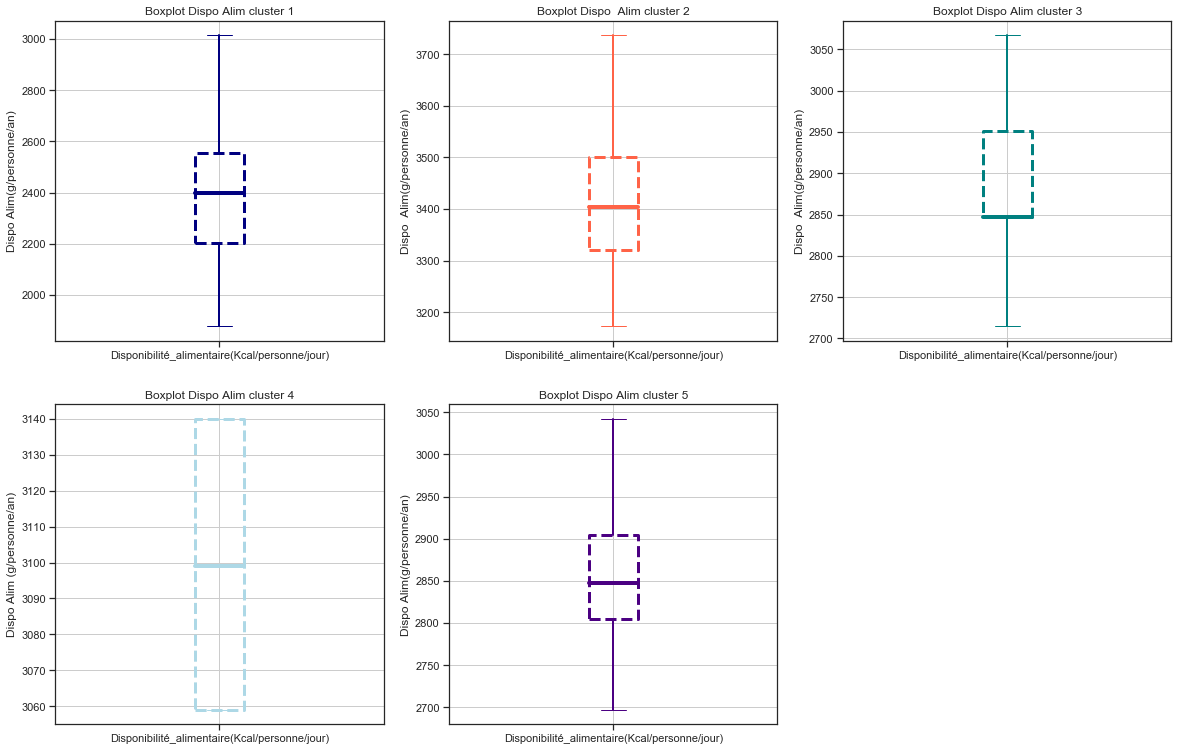

In [70]:
# boxplot  de la variable disponibilité alimentaire journalieres per capita
fig = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_cluster_1= plt.subplot(3,3,1)
BoxplotElements = df_cluster_1.boxplot(column='Disponibilité_alimentaire(Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_1.set_title('Boxplot Dispo Alim cluster 1')
plot_df_cluster_1.set_ylabel('Dispo Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_df_cluster_2= plt.subplot(3,3,2)
BoxplotElements = df_cluster_2.boxplot(column='Disponibilité_alimentaire(Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_2.set_title('Boxplot Dispo  Alim cluster 2')
plot_df_cluster_2.set_ylabel('Dispo  Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')

plot_df_cluster_3= plt.subplot(3,3,3)
BoxplotElements = df_cluster_3.boxplot(column='Disponibilité_alimentaire(Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_3.set_title('Boxplot Dispo Alim cluster 3')
plot_df_cluster_3.set_ylabel('Dispo  Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_df_cluster_4= plt.subplot(3,3,4)
BoxplotElements = df_cluster_4.boxplot(column='Disponibilité_alimentaire(Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_4.set_title('Boxplot Dispo Alim cluster 4')
plot_df_cluster_4.set_ylabel('Dispo Alim (g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_df_cluster_5= plt.subplot(3,3,5)
BoxplotElements = df_cluster_5.boxplot(column='Disponibilité_alimentaire(Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_5.set_title('Boxplot Dispo Alim cluster 5')
plot_df_cluster_5.set_ylabel('Dispo Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig.savefig('compare_dispo_Alim_cah')

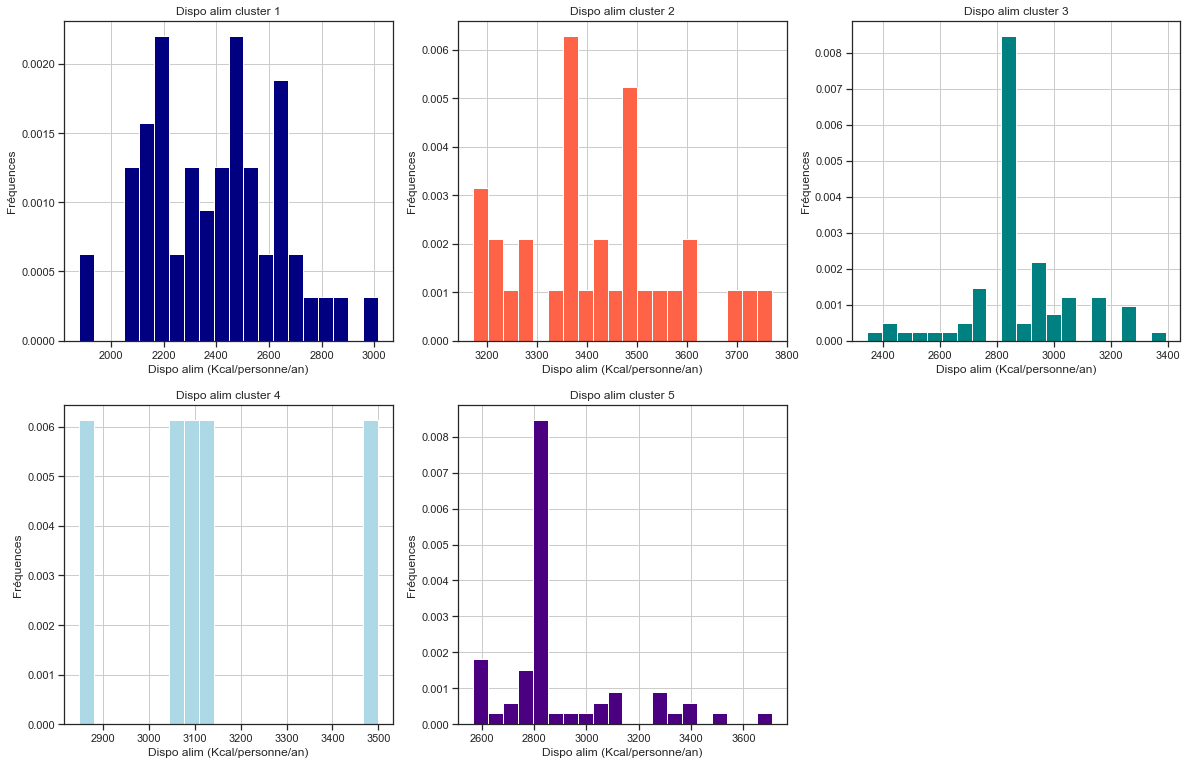

In [71]:
# histogramme de variable 'Disponibilité_alimentaire(Kcal/personne/jour)'
fig1 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_cluster_1 = df_cluster_1['Disponibilité_alimentaire(Kcal/personne/jour)'].hist(density=True, bins=20,color='navy')
plot_df_cluster_1.set_title('Dispo alim cluster 1')
plot_df_cluster_1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_cluster_1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_cluster_2 = df_cluster_2['Disponibilité_alimentaire(Kcal/personne/jour)'].hist(density=True, bins=20,color='tomato')
plot_df_cluster_2.set_title('Dispo alim cluster 2')
plot_df_cluster_2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_cluster_2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_cluster_3 = df_cluster_3['Disponibilité_alimentaire(Kcal/personne/jour)'].hist(density=True, bins=20,color='teal')
plot_df_cluster_3.set_title('Dispo alim cluster 3')
plot_df_cluster_3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_cluster_3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_cluster_4 = df_cluster_4['Disponibilité_alimentaire(Kcal/personne/jour)'].hist(density=True, bins=20,color='lightblue')
plot_df_cluster_4.set_title('Dispo alim cluster 4')
plot_df_cluster_4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_cluster_4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_cluster_5 = df_cluster_5['Disponibilité_alimentaire(Kcal/personne/jour)'].hist(density=True, bins=20,color='indigo')
plot_df_cluster_5.set_title('Dispo alim cluster 5')
plot_df_cluster_5.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_df_cluster_5.set_ylabel('Fréquences')

fig1.savefig('compare_dispo_alim_histo_cah')

#### Variable disponibilité de proteines 

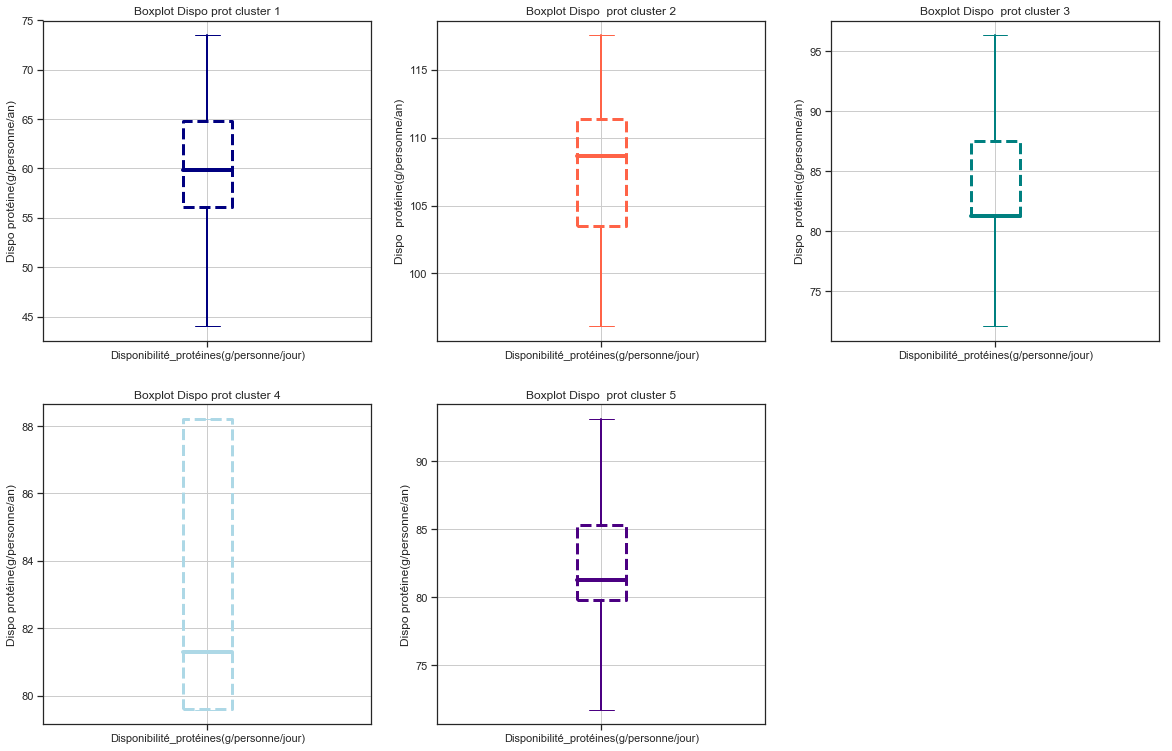

In [72]:
# boxplot  de la variable disponibilité de proteines journalieres per capita
fig2 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_cluster_1= plt.subplot(3,3,1)
BoxplotElements = df_cluster_1.boxplot(column='Disponibilité_protéines(g/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_1.set_title('Boxplot Dispo prot cluster 1')
plot_df_cluster_1.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_df_cluster_2= plt.subplot(3,3,2)
BoxplotElements = df_cluster_2.boxplot(column='Disponibilité_protéines(g/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_2.set_title('Boxplot Dispo  prot cluster 2')
plot_df_cluster_2.set_ylabel('Dispo  protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')

plot_df_cluster_3= plt.subplot(3,3,3)
BoxplotElements = df_cluster_3.boxplot(column='Disponibilité_protéines(g/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_3.set_title('Boxplot Dispo  prot cluster 3')
plot_df_cluster_3.set_ylabel('Dispo  protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_df_cluster_4= plt.subplot(3,3,4)
BoxplotElements = df_cluster_4.boxplot(column='Disponibilité_protéines(g/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_4.set_title('Boxplot Dispo prot cluster 4')
plot_df_cluster_4.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_df_cluster_5= plt.subplot(3,3,5)
BoxplotElements = df_cluster_5.boxplot(column='Disponibilité_protéines(g/personne/jour)', showfliers=False,return_type='dict')
plot_df_cluster_5.set_title('Boxplot Dispo  prot cluster 5')
plot_df_cluster_5.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig2.savefig('compare_dispo_prot_cah')


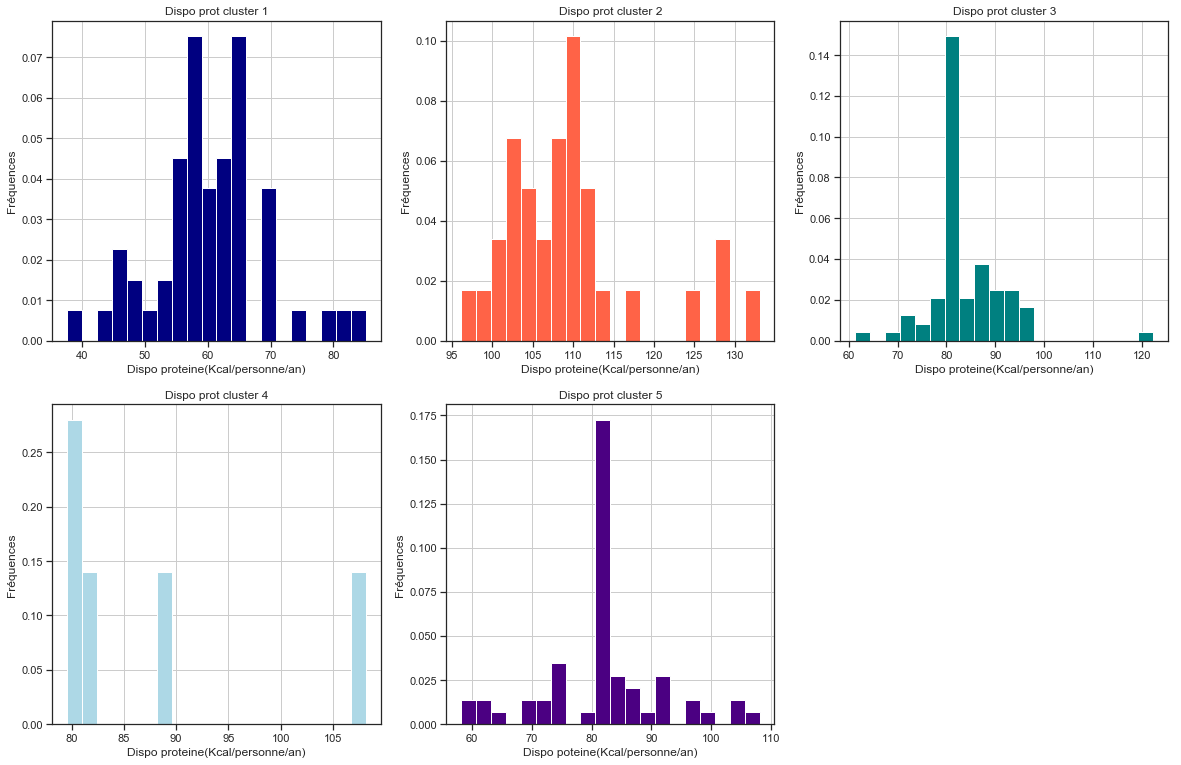

In [73]:
# histogramme de variable 'Disponibilité_protéines(g/personne/jour)''
fig2 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_cluster_1 = df_cluster_1['Disponibilité_protéines(g/personne/jour)'].hist(density=True, bins=20,color='navy')
plot_df_cluster_1.set_title('Dispo prot cluster 1')
plot_df_cluster_1.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_df_cluster_1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_cluster_2 = df_cluster_2['Disponibilité_protéines(g/personne/jour)'].hist(density=True, bins=20,color='tomato')
plot_df_cluster_2.set_title('Dispo prot cluster 2')
plot_df_cluster_2.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_df_cluster_2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_cluster_3 = df_cluster_3['Disponibilité_protéines(g/personne/jour)'].hist(density=True, bins=20,color='teal')
plot_df_cluster_3.set_title('Dispo prot cluster 3')
plot_df_cluster_3.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_df_cluster_3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_cluster_4 = df_cluster_4['Disponibilité_protéines(g/personne/jour)'].hist(density=True, bins=20,color='lightblue')
plot_df_cluster_4.set_title('Dispo prot cluster 4')
plot_df_cluster_4.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_df_cluster_4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_cluster_5 = df_cluster_5['Disponibilité_protéines(g/personne/jour)'].hist(density=True, bins=20,color='indigo')
plot_df_cluster_5.set_title('Dispo prot cluster 5')
plot_df_cluster_5.set_xlabel('Dispo poteine(Kcal/personne/an)')
plot_df_cluster_5.set_ylabel('Fréquences')

fig2.savefig('compare_dispo_prot_histo_cah')

#### Variable ratio proteine total /proteine animal

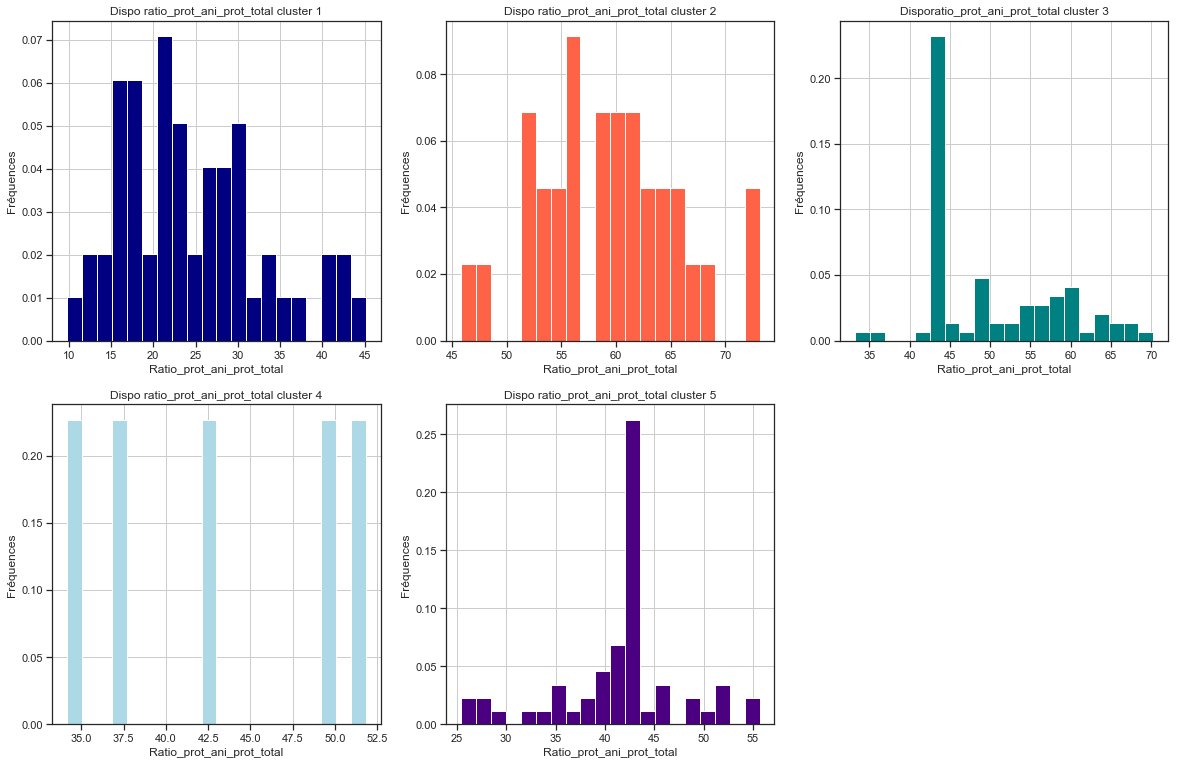

In [74]:
# histogramme de variable 'ratio_prot_ani_prot_total'
fig3 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_cluster_1 = df_cluster_1['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='navy')
plot_df_cluster_1.set_title('Dispo ratio_prot_ani_prot_total cluster 1')
plot_df_cluster_1.set_xlabel('Ratio_prot_ani_prot_total')
plot_df_cluster_1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_cluster_2 = df_cluster_2['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='tomato')
plot_df_cluster_2.set_title('Dispo ratio_prot_ani_prot_total cluster 2')
plot_df_cluster_2.set_xlabel('Ratio_prot_ani_prot_total')
plot_df_cluster_2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_cluster_3 = df_cluster_3['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='teal')
plot_df_cluster_3.set_title('Disporatio_prot_ani_prot_total cluster 3')
plot_df_cluster_3.set_xlabel('Ratio_prot_ani_prot_total')
plot_df_cluster_3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_cluster_4 = df_cluster_4['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='lightblue')
plot_df_cluster_4.set_title('Dispo ratio_prot_ani_prot_total cluster 4')
plot_df_cluster_4.set_xlabel('Ratio_prot_ani_prot_total')
plot_df_cluster_4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_cluster_5 = df_cluster_5['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='indigo')
plot_df_cluster_5.set_title('Dispo ratio_prot_ani_prot_total cluster 5')
plot_df_cluster_5.set_xlabel('Ratio_prot_ani_prot_total')
plot_df_cluster_5.set_ylabel('Fréquences')

fig3.savefig('compare_Ratio_prot_ani_prot_total_histo_cah')

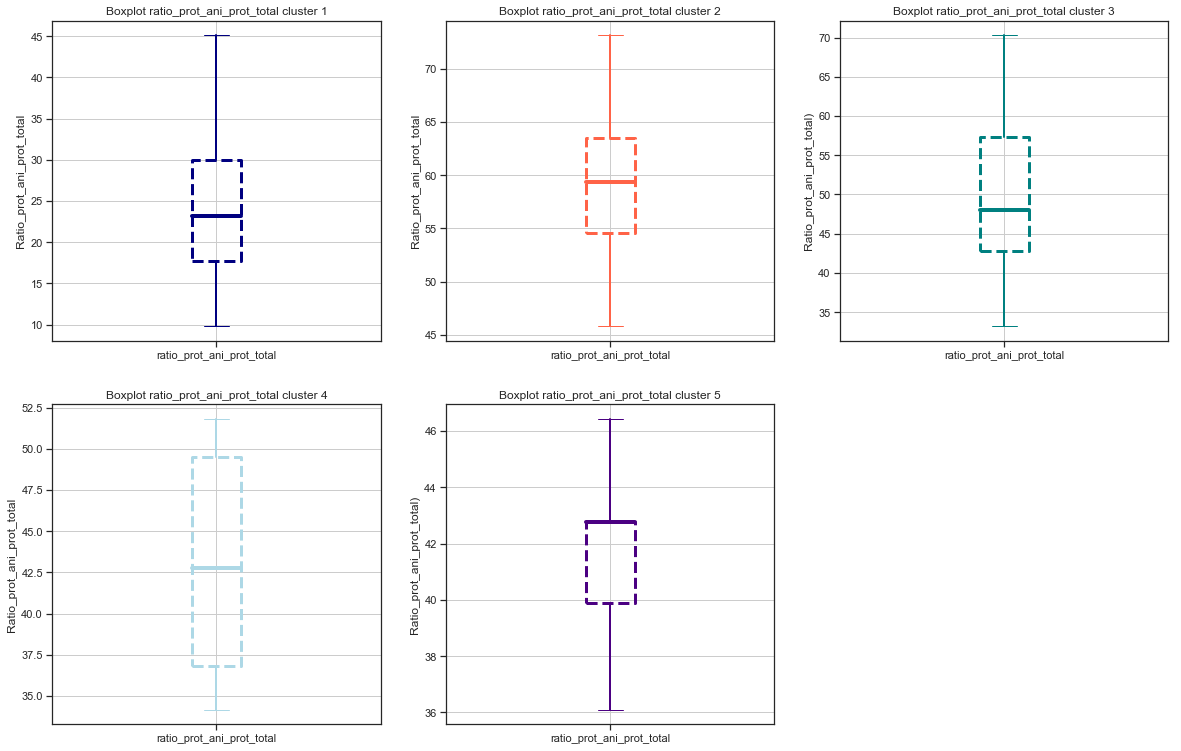

In [75]:
# boxplot  de la variable ratio_prot_ani_prot_total
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_cluster_1= plt.subplot(3,3,1)
BoxplotElements = df_cluster_1.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_df_cluster_1.set_title('Boxplot ratio_prot_ani_prot_total cluster 1')
plot_df_cluster_1.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_df_cluster_2= plt.subplot(3,3,2)
BoxplotElements = df_cluster_2.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_df_cluster_2.set_title('Boxplot ratio_prot_ani_prot_total cluster 2')
plot_df_cluster_2.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')

plot_df_cluster_3= plt.subplot(3,3,3)
BoxplotElements = df_cluster_3.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_df_cluster_3.set_title('Boxplot ratio_prot_ani_prot_total cluster 3')
plot_df_cluster_3.set_ylabel('Ratio_prot_ani_prot_total)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_df_cluster_4= plt.subplot(3,3,4)
BoxplotElements = df_cluster_4.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_df_cluster_4.set_title('Boxplot ratio_prot_ani_prot_total cluster 4')
plot_df_cluster_4.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_df_cluster_5= plt.subplot(3,3,5)
BoxplotElements = df_cluster_5.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_df_cluster_5.set_title('Boxplot ratio_prot_ani_prot_total cluster 5')
plot_df_cluster_5.set_ylabel('Ratio_prot_ani_prot_total)')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig3.savefig('compare_ratio_prot_ani_prot_total_cah')


#### Variable pourcentage de population 

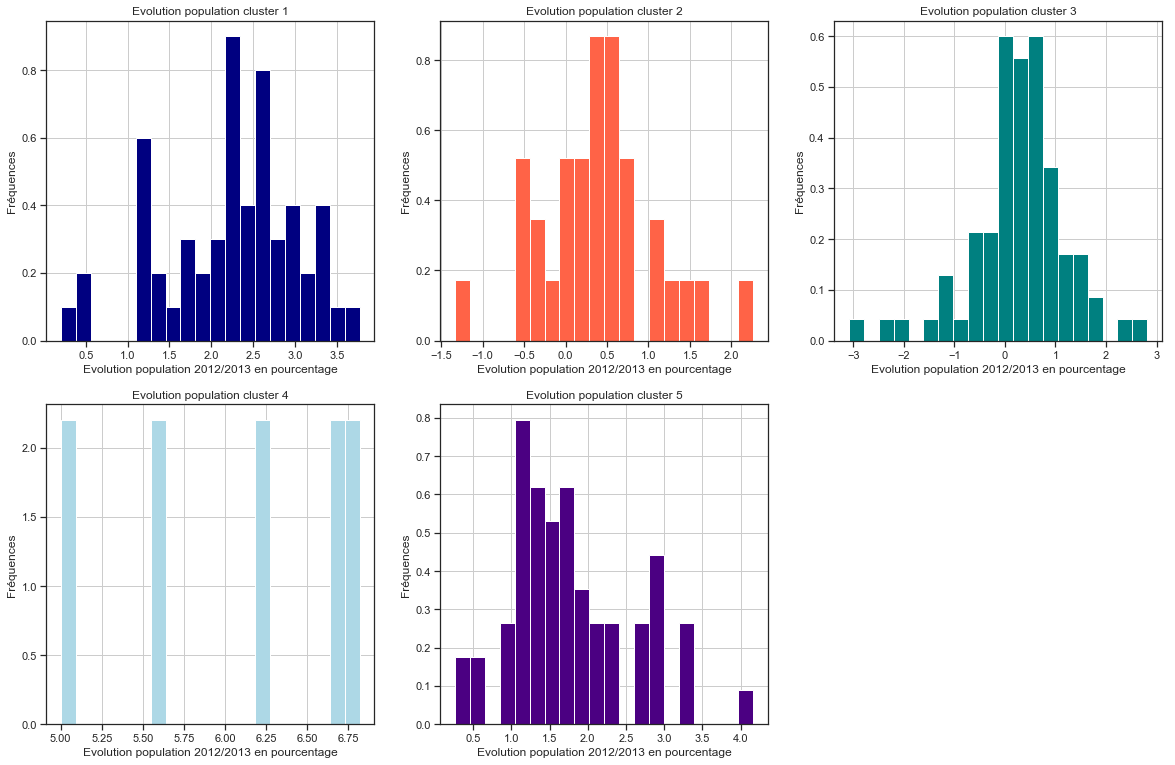

In [76]:
fig4 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_df_cluster_1 = df_cluster_1['pourcentage_dif_pop_2012_2013'].hist(density=True, bins=20,color='navy')
plot_df_cluster_1.set_title('Evolution population cluster 1')
plot_df_cluster_1.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_cluster_1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_df_cluster_2 = df_cluster_2['pourcentage_dif_pop_2012_2013'].hist(density=True, bins=20,color='tomato')
plot_df_cluster_2.set_title('Evolution population cluster 2')
plot_df_cluster_2.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_cluster_2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_df_cluster_3 = df_cluster_3['pourcentage_dif_pop_2012_2013'].hist(density=True, bins=20,color='teal')
plot_df_cluster_3.set_title('Evolution population cluster 3')
plot_df_cluster_3.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_cluster_3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_df_cluster_4 = df_cluster_4['pourcentage_dif_pop_2012_2013'].hist(density=True, bins=20,color='lightblue')
plot_df_cluster_4.set_title('Evolution population cluster 4')
plot_df_cluster_4.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_cluster_4.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_df_cluster_5 = df_cluster_5['pourcentage_dif_pop_2012_2013'].hist(density=True, bins=20,color='indigo')
plot_df_cluster_5.set_title('Evolution population cluster 5')
plot_df_cluster_5.set_xlabel('Evolution population 2012/2013 en pourcentage')
plot_df_cluster_5.set_ylabel('Fréquences')

fig4.savefig('compare_evolution_pop_cah')

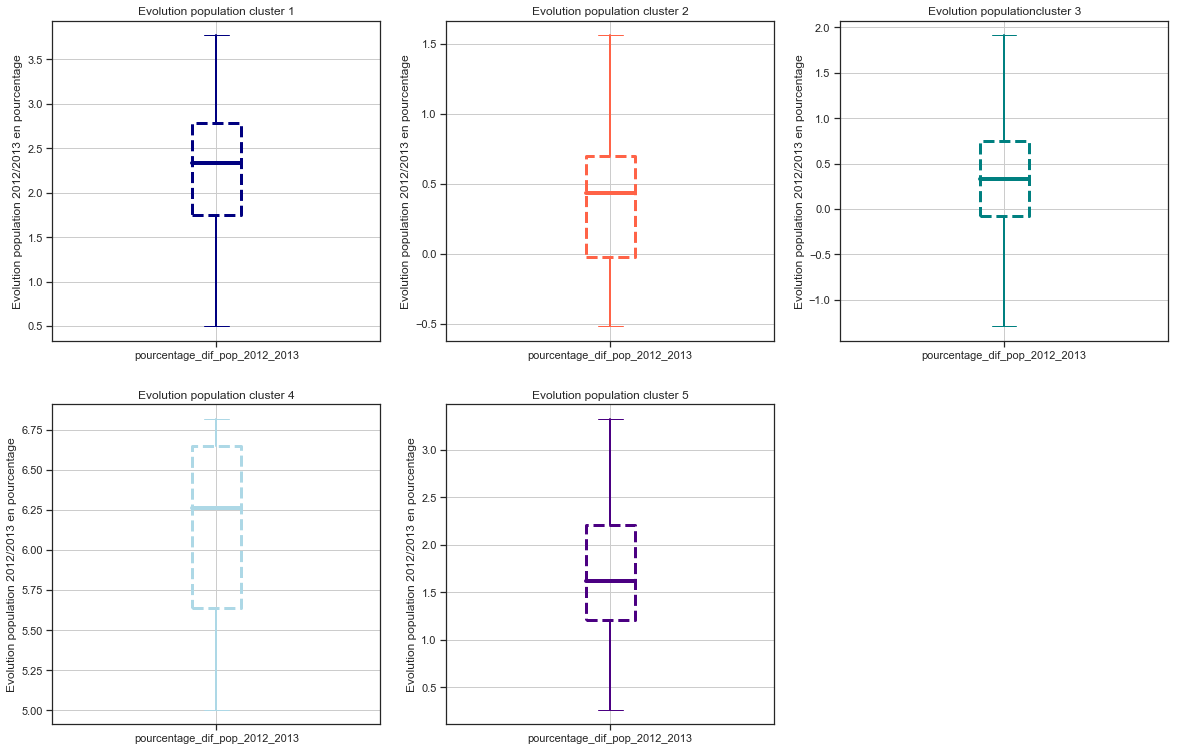

In [77]:
# boxplot  de la variable 'pourcentage_dif_pop_2012_2013'
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_df_cluster_1= plt.subplot(3,3,1)
BoxplotElements = df_cluster_1.boxplot(column='pourcentage_dif_pop_2012_2013', showfliers=False,return_type='dict')
plot_df_cluster_1.set_title('Evolution population cluster 1')
plot_df_cluster_1.set_ylabel('Evolution population 2012/2013 en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_df_cluster_2= plt.subplot(3,3,2)
BoxplotElements = df_cluster_2.boxplot(column='pourcentage_dif_pop_2012_2013', showfliers=False,return_type='dict')
plot_df_cluster_2.set_title('Evolution population cluster 2')
plot_df_cluster_2.set_ylabel('Evolution population 2012/2013 en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')

plot_df_cluster_3= plt.subplot(3,3,3)
BoxplotElements = df_cluster_3.boxplot(column='pourcentage_dif_pop_2012_2013', showfliers=False,return_type='dict')
plot_df_cluster_3.set_title('Evolution populationcluster 3')
plot_df_cluster_3.set_ylabel('Evolution population 2012/2013 en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_df_cluster_4= plt.subplot(3,3,4)
BoxplotElements = df_cluster_4.boxplot(column='pourcentage_dif_pop_2012_2013', showfliers=False,return_type='dict')
plot_df_cluster_4.set_title('Evolution population cluster 4')
plot_df_cluster_4.set_ylabel('Evolution population 2012/2013 en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_df_cluster_5= plt.subplot(3,3,5)
BoxplotElements = df_cluster_5.boxplot(column='pourcentage_dif_pop_2012_2013', showfliers=False,return_type='dict')
plot_df_cluster_5.set_title('Evolution population cluster 5')
plot_df_cluster_5.set_ylabel('Evolution population 2012/2013 en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig3.savefig('compare_Evolution populationl_cah')


### Caracteristiques de groupe de pays cible

1. PIB superieur  à la moyenne 
2. Importations des poulets  superieur à la moyenne 
3. Croissance de la population positive 

### Le Groupe 2 a la quantité plus elevé d'importation de poulets avec un PIB superieur à la moyenne avec une croissance de la population positive 

In [78]:
df_cluster_2.index

Index(['Albanie', 'Allemagne', 'Argentine', 'Australie', 'Autriche',
       'Belgique', 'Canada', 'Chine - RAS de Hong-Kong', 'Danemark', 'Espagne',
       'Estonie', 'États-Unis d'Amérique', 'Fédération de Russie', 'Finlande',
       'France', 'Grèce', 'Irlande', 'Islande', 'Israël', 'Italie', 'Lituanie',
       'Luxembourg', 'Malte', 'Monténégro', 'Norvège', 'Pays-Bas', 'Pologne',
       'Portugal', 'République de Corée', 'Roumanie', 'Royaume-Uni', 'Suède'],
      dtype='object', name='pays')

#### Approfondir l’analyse, reduction de la liste de pays
CAH avec les variables PIB, Exportation et Importation. 

In [79]:
df_2 = df_cluster_2[['Disponibilité_protéines(g/personne/jour)','Disponibilité_alimentaire(Kcal/personne/jour)','ratio_prot_ani_prot_total', 'pourcentage_dif_pop_2012_2013']]
df_2.head()

,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,
Albanie,111.37,3188.0,53.344707,-0.036348
Allemagne,101.39,3503.0,60.647007,0.244768
Argentine,102.60,3226.0,65.233918,1.041812
Australie,106.26,3278.0,67.466591,1.420603
Autriche,106.20,3770.0,59.190207,0.702209


In [80]:
# standardisation des données
X = df_2.values
X=StandardScaler().fit_transform(X)

In [81]:
Z = sch.linkage(X ,method='ward',metric='euclidean')

In [82]:
#identifiants de 5 groupes obtenus
groupes_cah_2 = fcluster(Z,2,criterion='maxclust')
print(groupes_cah_2)

[1 1 2 2 1 1 1 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 2]


In [83]:
# df cluster 
idg = np.argsort(groupes_cah_2)
df_dendogramme_2 = pd.DataFrame(df_2.index[idg],groupes_cah_2[idg]).reset_index()
df_dendogramme_2 = df_dendogramme_2.rename(columns={'index':'cluster'})
df_dendogramme_2.head()

,cluster,pays
0,1,Albanie
1,1,Roumanie
2,1,République de Corée
3,1,Portugal
4,1,Pologne


In [84]:
#Réindexation df pour jointure
df_2.reset_index(inplace=True)

In [85]:
df_2 = pd.merge(df_dendogramme_2,df_2)
df_2

,cluster,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,1,Albanie,111.37,3188.0,53.344707,-0.036348
1,1,Roumanie,103.00,3359.0,45.834951,-0.513519
2,1,République de Corée,96.12,3333.0,47.992093,0.432532
3,1,Portugal,110.87,3472.0,60.692703,-0.514330
4,1,Pologne,101.46,3450.0,52.513306,-0.020760
5,1,Norvège,110.73,3483.0,59.577350,1.282110
6,1,Monténégro,111.90,3490.0,56.398570,0.112902
7,1,Malte,110.31,3374.0,55.969540,0.580513
8,1,Italie,108.49,3578.0,53.673150,-0.110334
9,1,Irlande,109.91,3602.0,58.975525,0.082230


### Interpretation de classes 

In [86]:
# df avec les pays de cluster 1
df_cluster_1 = df_2.loc[df_2['cluster']==1]
df_cluster_1

,cluster,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
0,1,Albanie,111.37,3188.0,53.344707,-0.036348
1,1,Roumanie,103.00,3359.0,45.834951,-0.513519
2,1,République de Corée,96.12,3333.0,47.992093,0.432532
3,1,Portugal,110.87,3472.0,60.692703,-0.514330
4,1,Pologne,101.46,3450.0,52.513306,-0.020760
5,1,Norvège,110.73,3483.0,59.577350,1.282110
6,1,Monténégro,111.90,3490.0,56.398570,0.112902
7,1,Malte,110.31,3374.0,55.969540,0.580513
8,1,Italie,108.49,3578.0,53.673150,-0.110334
9,1,Irlande,109.91,3602.0,58.975525,0.082230


In [87]:
# df avec les pays de cluster 2
df_cluster_2 = df_2.loc[df_2['cluster']==2]
df_cluster_2

,cluster,pays,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
19,2,Finlande,117.56,3366.0,62.121470,0.434756
20,2,Argentine,102.60,3226.0,65.233918,1.041812
21,2,Australie,106.26,3278.0,67.466591,1.420603
22,2,Pays-Bas,111.46,3222.0,67.970572,0.300504
23,2,Chine - RAS de Hong-Kong,129.07,3286.0,73.138607,0.589936
24,2,Lituanie,124.36,3414.0,61.506915,-1.331583
25,2,Danemark,108.74,3366.0,64.199007,0.481694
26,2,Israël,128.00,3610.0,56.609375,1.559882
27,2,Islande,133.06,3381.0,72.508643,0.459592
28,2,Espagne,104.76,3173.0,62.180221,-0.342311


In [88]:
# on calcule la moyenne pour chaque cluster (centroides)
df_clusters_avec_var_ext = df_2.groupby(['cluster']).mean()
df_clusters_avec_var_ext

,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
cluster,,,,
1,105.992105,3470.894737,55.587222,0.238133
2,115.191538,3348.000000,65.002465,0.622341


In [89]:
#moyenne par variable
m =df_2.mean()
m

cluster                                             1.406250
Disponibilité_protéines(g/personne/jour)          109.729375
Disponibilité_alimentaire(Kcal/personne/jour)    3420.968750
ratio_prot_ani_prot_total                          59.412164
pourcentage_dif_pop_2012_2013                       0.394217
dtype: float64

In [90]:
# on calcule la variance de chaque cluster
var = df_2.groupby(['cluster']).var(ddof=0)
var

,Disponibilité_alimentaire(Kcal/personne/jour),Disponibilité_protéines(g/personne/jour),pourcentage_dif_pop_2012_2013,ratio_prot_ani_prot_total
cluster,,,,
1,22485.462604,20.302922,0.251307,19.597383
2,17531.538462,96.322244,0.721482,18.866043


In [91]:
df_2.var(ddof=0)

cluster                                              0.241211
Disponibilité_protéines(g/personne/jour)            71.599350
Disponibilité_alimentaire(Kcal/personne/jour)    24115.967773
ratio_prot_ani_prot_total                           40.682855
pourcentage_dif_pop_2012_2013                        0.477922
dtype: float64

In [92]:
#TSS
TSS = df_2.shape[0]*df_2.var(ddof=0)
print(TSS)

cluster                                               7.718750
Disponibilité_protéines(g/personne/jour)           2291.179187
Disponibilité_alimentaire(Kcal/personne/jour)    771710.968750
ratio_prot_ani_prot_total                          1301.851353
pourcentage_dif_pop_2012_2013                        15.293497
dtype: float64


In [93]:
#data.frame conditionnellement aux groupes avec CAH
gb = df_2.groupby('cluster')
#effectifs conditionnels
nk = gb.size()
print(nk)

cluster
1    19
2    13
dtype: int64


In [94]:
#pour chaque groupe écart à la moyenne par variable
EMk = (df_clusters_avec_var_ext-m)**2
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

Disponibilité_alimentaire(Kcal/personne/jour)    116577.179276
Disponibilité_protéines(g/personne/jour)            653.234502
cluster                                               0.000000
pourcentage_dif_pop_2012_2013                         1.139408
ratio_prot_ani_prot_total                           684.242518
dtype: float64


In [95]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)

Disponibilité_alimentaire(Kcal/personne/jour)    0.151063
Disponibilité_protéines(g/personne/jour)         0.285108
cluster                                          0.000000
pourcentage_dif_pop_2012_2013                    0.074503
ratio_prot_ani_prot_total                        0.525592
dtype: float64


La définition des groupes est dominée par les exportationset les importations

### Liste de pays à cibler

In [96]:
df_cluster_1.pays

0                   Albanie
1                  Roumanie
2       République de Corée
3                  Portugal
4                   Pologne
5                   Norvège
6                Monténégro
7                     Malte
8                    Italie
9                   Irlande
10              Royaume-Uni
11     Fédération de Russie
12                    Grèce
13                Allemagne
14                  Estonie
15                 Autriche
16                 Belgique
17                   Canada
18    États-Unis d'Amérique
Name: pays, dtype: object

### Visualisez vos partitions dans le premier plan factoriel obtenu par ACP

In [97]:
df =df[['cluster','Disponibilité_protéines(g/personne/jour)','Disponibilité_alimentaire(Kcal/personne/jour)','ratio_prot_ani_prot_total', 'pourcentage_dif_pop_2012_2013']] 
df

,cluster,Disponibilité_protéines(g/personne/jour),Disponibilité_alimentaire(Kcal/personne/jour),ratio_prot_ani_prot_total,pourcentage_dif_pop_2012_2013
pays,,,,,
Afghanistan,1,58.260000,2087.000000,20.957775,3.260873
Afrique du Sud,5,85.330000,3020.000000,42.646197,1.430575
Albanie,2,111.370000,3188.000000,53.344707,-0.036348
Algérie,5,91.920000,3293.000000,27.175805,2.015503
Allemagne,2,101.390000,3503.000000,60.647007,0.244768
Andorre,3,81.299598,2847.367816,42.768671,-2.033718
Angola,1,57.270000,2474.000000,32.128514,3.470183
Anguilla,5,81.299598,2847.367816,42.768671,1.188894
Antigua-et-Barbuda,3,83.490000,2416.000000,68.068032,1.070289


In [98]:
features = ['Disponibilité_protéines(g/personne/jour)','Disponibilité_alimentaire(Kcal/personne/jour)','ratio_prot_ani_prot_total', 'pourcentage_dif_pop_2012_2013']
# valuers de variables quantitatives
x = df.loc[:, features].values
# variable categorielle
y = df.cluster.values
# Standardisation de variables quantitatives
x = StandardScaler().fit_transform(x)


In [99]:
#instanciation
pca = PCA(svd_solver='auto')

In [100]:
#calculs
coord = pca.fit_transform(x)
#nombre de composantes calculées
print(pca.n_components_)

4


In [101]:
#valeurs propres
eigval = pca.explained_variance_
print(eigval)

[2.66744799 0.82126277 0.42104244 0.10771405]


In [102]:
#dimension
print(x.shape) # (18, 6)
#nombre d'observations
n = x.shape[0]
#nombre de variables
p = x.shape[1]
#affichage des données
print(x)

(230, 4)
[[-1.33062519e+00 -1.99916454e+00 -1.55689276e+00  1.42747507e+00]
 [ 2.32771201e-01  4.53885782e-01 -8.74232463e-03  1.13806231e-01]
 [ 1.73668114e+00  8.95592592e-01  7.54932540e-01 -9.39056180e-01]
 [ 6.13368992e-01  1.17165935e+00 -1.11304095e+00  5.33629713e-01]
 [ 1.16029784e+00  1.72379286e+00  1.27618110e+00 -7.37289177e-01]
 [ 0.00000000e+00 -1.19562501e-15 -5.07195527e-16 -2.37263833e+00]
 [-1.38780149e+00 -9.81661352e-01 -7.59509525e-01  1.57770437e+00]
 [ 0.00000000e+00 -1.19562501e-15 -5.07195527e-16 -5.96565603e-02]
 [ 1.26504139e-01 -1.13415537e+00  1.80590447e+00 -1.44783404e-01]
 [ 5.94310225e-01  1.07174947e+00  5.83096135e-02  1.14384602e+00]
 [ 1.23017998e+00  9.95502466e-01  1.60360138e+00 -1.65222777e-01]
 [ 5.05946853e-01  2.01481890e-01  3.74307462e-01 -6.25552107e-01]
 [ 0.00000000e+00 -1.19562501e-15 -5.07195527e-16 -4.88671632e-01]
 [ 1.44155903e+00  1.13222124e+00  1.76297278e+00  1.06649030e-01]
 [ 1.43809380e+00  2.42579119e+00  1.17219268e+00 -4.

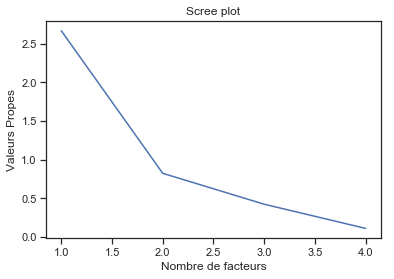

<Figure size 432x288 with 0 Axes>

In [103]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeurs Propes")
plt.xlabel("Nombre de facteurs")
plt.show()
plt.savefig('Scree_plot')

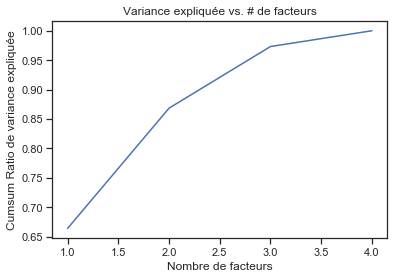

<Figure size 432x288 with 0 Axes>

In [104]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Variance expliquée vs. # de facteurs")
plt.ylabel("Cumsum Ratio de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()
plt.savefig('exp_var__plot')

In [105]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [106]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.667448  2.083333
1    0.821263  1.083333
2    0.421042  0.583333
3    0.107714  0.250000


In [107]:
# choix du nombre de composantes à calculer
n_comp = 4
 # ou data.index pour avoir les intitulés
features = features

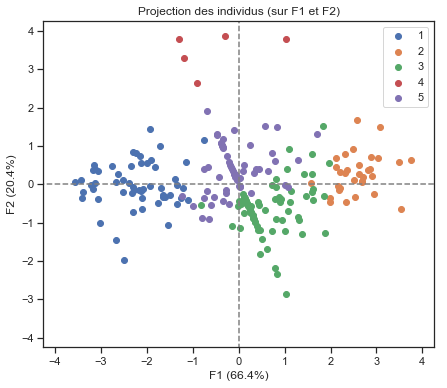

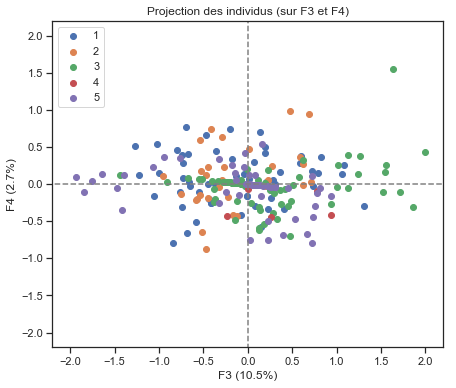

<Figure size 432x288 with 0 Axes>

In [108]:
# Projection des individus CAH
X_projected = pca.transform(x)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],illustrative_var =y, alpha = 1)


plt.show()
plt.savefig('Projection_cah')

Avec cette procédure, le premier et deuxième facteur sont valides.

### Reduction a 2 composants


In [109]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [110]:
principalDf.head()

,principal component 1,principal component 2
0,-3.126808,0.395730
1,0.338659,0.299636
2,2.181913,-0.148537
3,0.240178,1.015113
4,2.505965,0.116426


In [111]:

df= df.reset_index()
a = principalDf.join(df['pays'])
finalDf = a.join(df['cluster'])
finalDf.head()

,principal component 1,principal component 2,pays,cluster
0,-3.126808,0.395730,Afghanistan,1
1,0.338659,0.299636,Afrique du Sud,5
2,2.181913,-0.148537,Albanie,2
3,0.240178,1.015113,Algérie,5
4,2.505965,0.116426,Allemagne,2


In [112]:
# choix du nombre de composantes à calculer
n_comp = 2
 # ou data.index pour avoir les intitulés
features = features

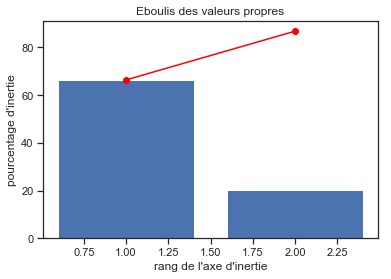

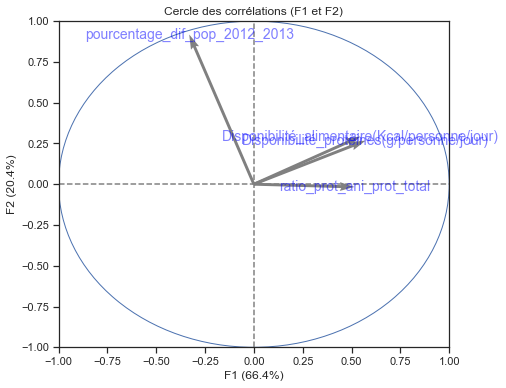

<Figure size 432x288 with 0 Axes>

In [113]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(x)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

plt.show()
plt.savefig('cercle_corr')

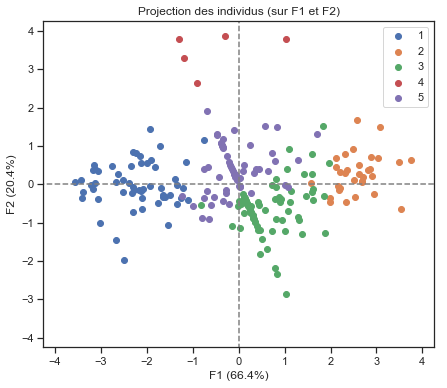

<Figure size 432x288 with 0 Axes>

In [114]:
# Projection des individus CAH
X_projected = pca.transform(x)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],illustrative_var = finalDf.cluster, alpha = 1)


plt.show()
plt.savefig('Projection_cah')

### Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :
* un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale.
* un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.


### Distribution de chacune de nos variables

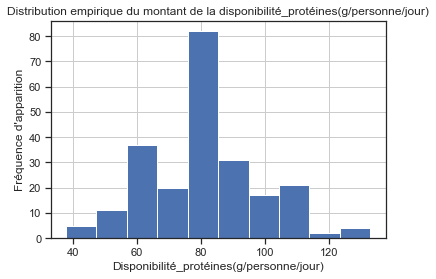

In [115]:
# plot idsponibilité_protéines
plot =df['Disponibilité_protéines(g/personne/jour)'].hist()
plt.title('Distribution empirique du montant de la disponibilité_protéines(g/personne/jour)')
plt.xlabel('Disponibilité_protéines(g/personne/jour)')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot.get_figure()
image.savefig('hist_disponibilité_protéines')

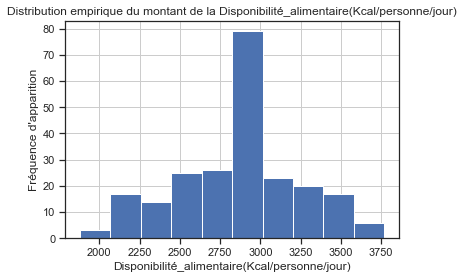

In [116]:
# plot Disponibilité_alimentaire(Kcal/personne/jour)
plot =df['Disponibilité_alimentaire(Kcal/personne/jour)'].hist()
plt.title('Distribution empirique du montant de la Disponibilité_alimentaire(Kcal/personne/jour)')
plt.xlabel('Disponibilité_alimentaire(Kcal/personne/jour)')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot.get_figure()
image.savefig('hist_disponibilité_alimentaire')

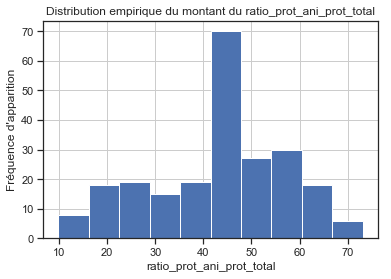

In [117]:
# plot ratio_prot_ani_prot_total
plot =df['ratio_prot_ani_prot_total'].hist()
plt.title('Distribution empirique du montant du ratio_prot_ani_prot_total')
plt.xlabel('ratio_prot_ani_prot_total')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot.get_figure()
image.savefig('hist_ratio_prot_ani_prot_total')

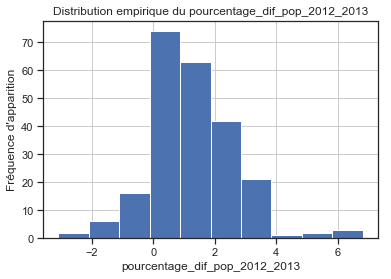

In [118]:
# plot PIB_en_euros
plot =df['pourcentage_dif_pop_2012_2013'].hist()
plt.title('Distribution empirique du pourcentage_dif_pop_2012_2013')
plt.xlabel('pourcentage_dif_pop_2012_2013')
plt.ylabel("Fréquence d'apparition")
plt.show()
image= plot.get_figure()
image.savefig('hist_Pop')

Nous partons de l'hypothèse nulle H0 que nos variables sont gaussiennes. Notre hypothèse alternative étant que la variable n'est pas gaussienne.

Nous fixons notre seuil de risque à p_valeur =0,01, afin de ne pas rejeter trop facilement les variables candidates.

In [119]:
var_1= df['Disponibilité_protéines(g/personne/jour)']
var_2 =df['Disponibilité_alimentaire(Kcal/personne/jour)']
var_3 =df['ratio_prot_ani_prot_total']
var_4 = df['pourcentage_dif_pop_2012_2013']

#### Les test D’Agostino (normaltest)
Cette fonction teste l'hypothèse nulle que l'échantillon provient d'une distribution normale.  Le test est basé sur les transformations du kurtosis et de l'asymétrie de l'échantillon et est plus puissant uniquement face aux tests alternatifs qui vérifie si la distribution est asymétrique ou kurtique.


In [120]:
# test de normalité
stat, p = stats.mstats.normaltest(var_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
	print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
	print('L’échantillon ne semble pas gaussien (rejeter H0)')

Statistics=2.781, p=0.249
L’échantillon semble gaussien (ne pas rejeter H0)


In [121]:
# test de normalité
stat, p = stats.mstats.normaltest(var_2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
	print('L’échantillon ne semble pas gaussien (rejeter H0)')

Statistics=0.114, p=0.945
L’échantillon semble gaussien (ne pas rejeter H0)


In [122]:
# test de normalité
stat, p = stats.mstats.normaltest(var_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
	print('L’échantillon ne semble pas gaussien (rejeter H0)')

Statistics=5.818, p=0.055
L’échantillon semble gaussien (ne pas rejeter H0)


In [123]:
# test de normalité
stat, p = stats.mstats.normaltest(var_4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
	print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
	print('L’échantillon ne semble pas gaussien (rejeter H0)')

Statistics=30.438, p=0.000
L’échantillon ne semble pas gaussien (rejeter H0)


Paramètres de sortie :

* k2 : float or array
* s^2 + k^2, où s est le z-score retourné par skewtest et k est le z-score retourné par kurtosistest.
* p-value : float or array
* Un chi2 faces carré probabilité pour le test d'hypothèses

## ANOVA

* H0 = Les deux variables  sont indépendantes
* H1 = Les deux variables  sont dépendantes

On a une variables quantitative et une variable qualitative donc on utilise le test de Anova pour confirmer où pas l'hypothèses du départ.

In [124]:
# Calcule ANOVA
aov = pg.anova(dv='Disponibilité_protéines(g/personne/jour)', between='cluster', data=df)
# Print  ANOVA 
pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2        F    p-unc    np2
--------  -------  -------  -------  -------  -----
cluster         4      225  160.388    0.000  0.740



In [125]:
# Calcule ANOVA
aov = pg.anova(dv='Disponibilité_alimentaire(Kcal/personne/jour)', between='cluster', data=df)
# Print  ANOVA 
pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2        F    p-unc    np2
--------  -------  -------  -------  -------  -----
cluster         4      225  124.008    0.000  0.688



In [126]:
# Calcule ANOVA
aov = pg.anova(dv='ratio_prot_ani_prot_total', between='cluster', data=df)
# Print  ANOVA 
pg.print_table(aov)


ANOVA SUMMARY

Source      ddof1    ddof2        F    p-unc    np2
--------  -------  -------  -------  -------  -----
cluster         4      225  128.493    0.000  0.696



### Test de Student - Test d'adéquation des moyennes

Vérifions si la moyenne varie significativement entre le cluster 2 et 3.

Nous rejetterons l'hypothèse nulle à un seuil de 1%.

In [127]:
stats.ttest_ind(var_1[df['cluster'] == 2], var_1[df['cluster'] == 3])

Ttest_indResult(statistic=15.411452674309912, pvalue=3.868186077058713e-29)

In [128]:
stats.ttest_ind(var_2[df['cluster'] == 2], var_2[df['cluster'] == 3])

Ttest_indResult(statistic=14.251012780963809, pvalue=1.1880613912777908e-26)

In [129]:
stats.ttest_ind(var_3[df['cluster'] == 2], var_3[df['cluster'] == 3])

Ttest_indResult(statistic=5.620272031086075, pvalue=1.480819208565572e-07)

On peut largement rejeter l'hypothèse nulle au seuil de 1%.

Sur nos deux clusters qui semblent les plus proches, on peut rejetter l'hypothèse nulle d'une moyenne similaire. Ceci confirme la qualité de nos groupes

### Test de Fisher -Test d'adéquation de la variance

Vérifions si les variances sont similaires.

Hypothèse nulle : Les variances sont similaires.

Hypothèse alternative : Les variances sont différentes.

In [130]:
stats.bartlett(var_1[df['cluster'] == 2], var_1[df['cluster'] == 3])

BartlettResult(statistic=0.4707238354638099, pvalue=0.4926543587509892)

In [131]:
stats.ttest_ind(var_2[df['cluster'] == 2], var_2[df['cluster'] == 3])

Ttest_indResult(statistic=14.251012780963809, pvalue=1.1880613912777908e-26)

In [132]:
stats.ttest_ind(var_3[df['cluster'] == 2], var_3[df['cluster'] == 3])

Ttest_indResult(statistic=5.620272031086075, pvalue=1.480819208565572e-07)

Avec la variable Disponibilité protéines(g/personne/jour) l'hypothèse nulle ne peut pas être rejetée, on considère donc les variances similaires.
Par contre avec les varibles Disponibilité alimentaire(Kcal/personne/jour) et  ratio_prot_ani_prot_total on a des p_valeurs de 0 donc on peut rejeter H0.  